In [1]:
#Binding constants Version 2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 400
plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams["mathtext.fontset"] = 'cm'
from numpy import cos, sin, rad2deg, deg2rad, sqrt, array, arccos, vdot, nan, nan_to_num
from numpy.linalg import norm
import numpy as np
import scipy.stats
save_to_loc = 'C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/FFPR/'

In [2]:
#xTB analysis
xTB_loc = 'C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/MnII_CoII/5_coor_ligands_v2/ORCA_Energy_Calcs/'
H2O_en = -76.475255626503
MnIIH2O6 = -1609.729366984552
CoIIIH2O6 = -1841.196250566755
HF = 2625.5
lig_df = pd.read_csv(xTB_loc+'Ligands.csv')
CoIIILig_df = pd.read_csv(xTB_loc+'CoIIILigands.csv')
MnIILig_df = pd.read_csv(xTB_loc+'MnIILigands.csv')
num_water = pd.read_csv(xTB_loc+'water.csv')
num_water.set_index('identifier', inplace=True)
MnIILig_df.rename(columns={'single_point_energy':'xTB_MnLig_en'}, inplace=True)
MnIILig_df.set_index('identifier', inplace=True)
CoIIILig_df.rename(columns={'single_point_energy':'xTB_CoLig_en'}, inplace=True)
CoIIILig_df.set_index('identifier', inplace=True)
lig_df.rename(columns={'single_point_energy':'xTB_Lig_en'}, inplace=True)
lig_df.set_index('identifier', inplace=True)
MnII_7coor_id = pd.read_csv(xTB_loc+'7_coor_MnII_cleaned_up_identifiers.csv')
#MnII_7coor_id.set_index('identifier', inplace=True)
CoIII_7coor_id = pd.read_csv(xTB_loc+'7_coor_CoIII_cleaned_up_identifiers.csv')
#CoIII_7coor_id.set_index('identifier', inplace=True)
xTB_enthalpy = pd.merge(lig_df['xTB_Lig_en'], CoIIILig_df['xTB_CoLig_en'], left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy = pd.merge(xTB_enthalpy, MnIILig_df['xTB_MnLig_en'], left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy = pd.merge(xTB_enthalpy, num_water, left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy.dropna(inplace=True)
xTB_enthalpy = pd.merge(xTB_enthalpy, MnII_7coor_id, left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy = xTB_enthalpy.drop(columns=['SMILES_string'])
xTB_enthalpy = pd.merge(xTB_enthalpy, CoIII_7coor_id, left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy.set_index('identifier', inplace=True)
xTB_enthalpy['xTB_Mn_binding_enthalpy'] = (xTB_enthalpy['xTB_MnLig_en']+(6-xTB_enthalpy['num_of_water_attached'])*H2O_en)-(MnIIH2O6+xTB_enthalpy['xTB_Lig_en'])
xTB_enthalpy['xTB_Mn_binding_enthalpy / kJ mol-1'] = xTB_enthalpy['xTB_Mn_binding_enthalpy']*HF
xTB_enthalpy['xTB_Co_binding_enthalpy'] = (xTB_enthalpy['xTB_CoLig_en']+(6-xTB_enthalpy['num_of_water_attached'])*H2O_en)-(CoIIIH2O6+xTB_enthalpy['xTB_Lig_en'])
xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1'] = xTB_enthalpy['xTB_Co_binding_enthalpy']*HF
lig_charge = pd.read_csv(xTB_loc+'ligand_charge.csv')
lig_charge.set_index('identifier', inplace=True)
xTB_enthalpy = pd.merge(xTB_enthalpy, lig_charge, left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy['xTB_enthalpy_difference_MnII-CoIII / kJ mol-1'] = xTB_enthalpy['xTB_Mn_binding_enthalpy / kJ mol-1'] - xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1']
xTB_enthalpy.sort_values(by='xTB_enthalpy_difference_MnII-CoIII / kJ mol-1', ascending=True, inplace=True)
xTB_enthalpy.to_csv(xTB_loc+'Results.csv')
MnIILig_df

,optimisation_successful,IR_freq_analysis_successful,running,xTB_MnLig_en
identifier,,,,
ABIYAL_m_S,yes,NaN,8,-2761.835096
AJUYAF_2_S,yes,NaN,2,-2463.084773
AMANCW_N,yes,NaN,2,-2761.626709
ANTAMA_4_N,yes,NaN,15,-4424.107944
AYEZEJ_2_NS,yes,NaN,2,-10310.331642
...,...,...,...,...
YUPBAN01_5_N,NaN,NaN,resubmit,NaN
YUPBAN01_5_NS,NaN,NaN,resubmit,NaN
ZEJCOG_4_N,yes,NaN,4,-3168.385384


In [3]:
#Mn xTB enthalpy alone
Mn_xTB_enthalpy = pd.merge(MnIILig_df['xTB_MnLig_en'], num_water, left_on='identifier', right_on='identifier', how='inner')
Mn_xTB_enthalpy = pd.merge(Mn_xTB_enthalpy, lig_df['xTB_Lig_en'], left_on='identifier', right_on='identifier', how='inner')
Mn_xTB_enthalpy.dropna(inplace=True)
Mn_xTB_enthalpy['Mn_xTB_enthalpy / kJ mol-1'] = ((Mn_xTB_enthalpy['xTB_MnLig_en']+(6-Mn_xTB_enthalpy['num_of_water_attached'])*H2O_en)-(Mn_xTB_enthalpy['xTB_Lig_en']+MnIIH2O6))*HF
Co_xTB_enthalpy = pd.merge(CoIIILig_df['xTB_CoLig_en'], num_water, left_on='identifier', right_on='identifier', how='inner')
Co_xTB_enthalpy = pd.merge(Co_xTB_enthalpy, lig_df['xTB_Lig_en'], left_on='identifier', right_on='identifier', how='inner')
Co_xTB_enthalpy.dropna(inplace=True)
Co_xTB_enthalpy['Co_xTB_enthalpy / kJ mol-1'] = ((Co_xTB_enthalpy['xTB_CoLig_en']+(6-Co_xTB_enthalpy['num_of_water_attached'])*H2O_en)-(Co_xTB_enthalpy['xTB_Lig_en']+CoIIIH2O6))*HF

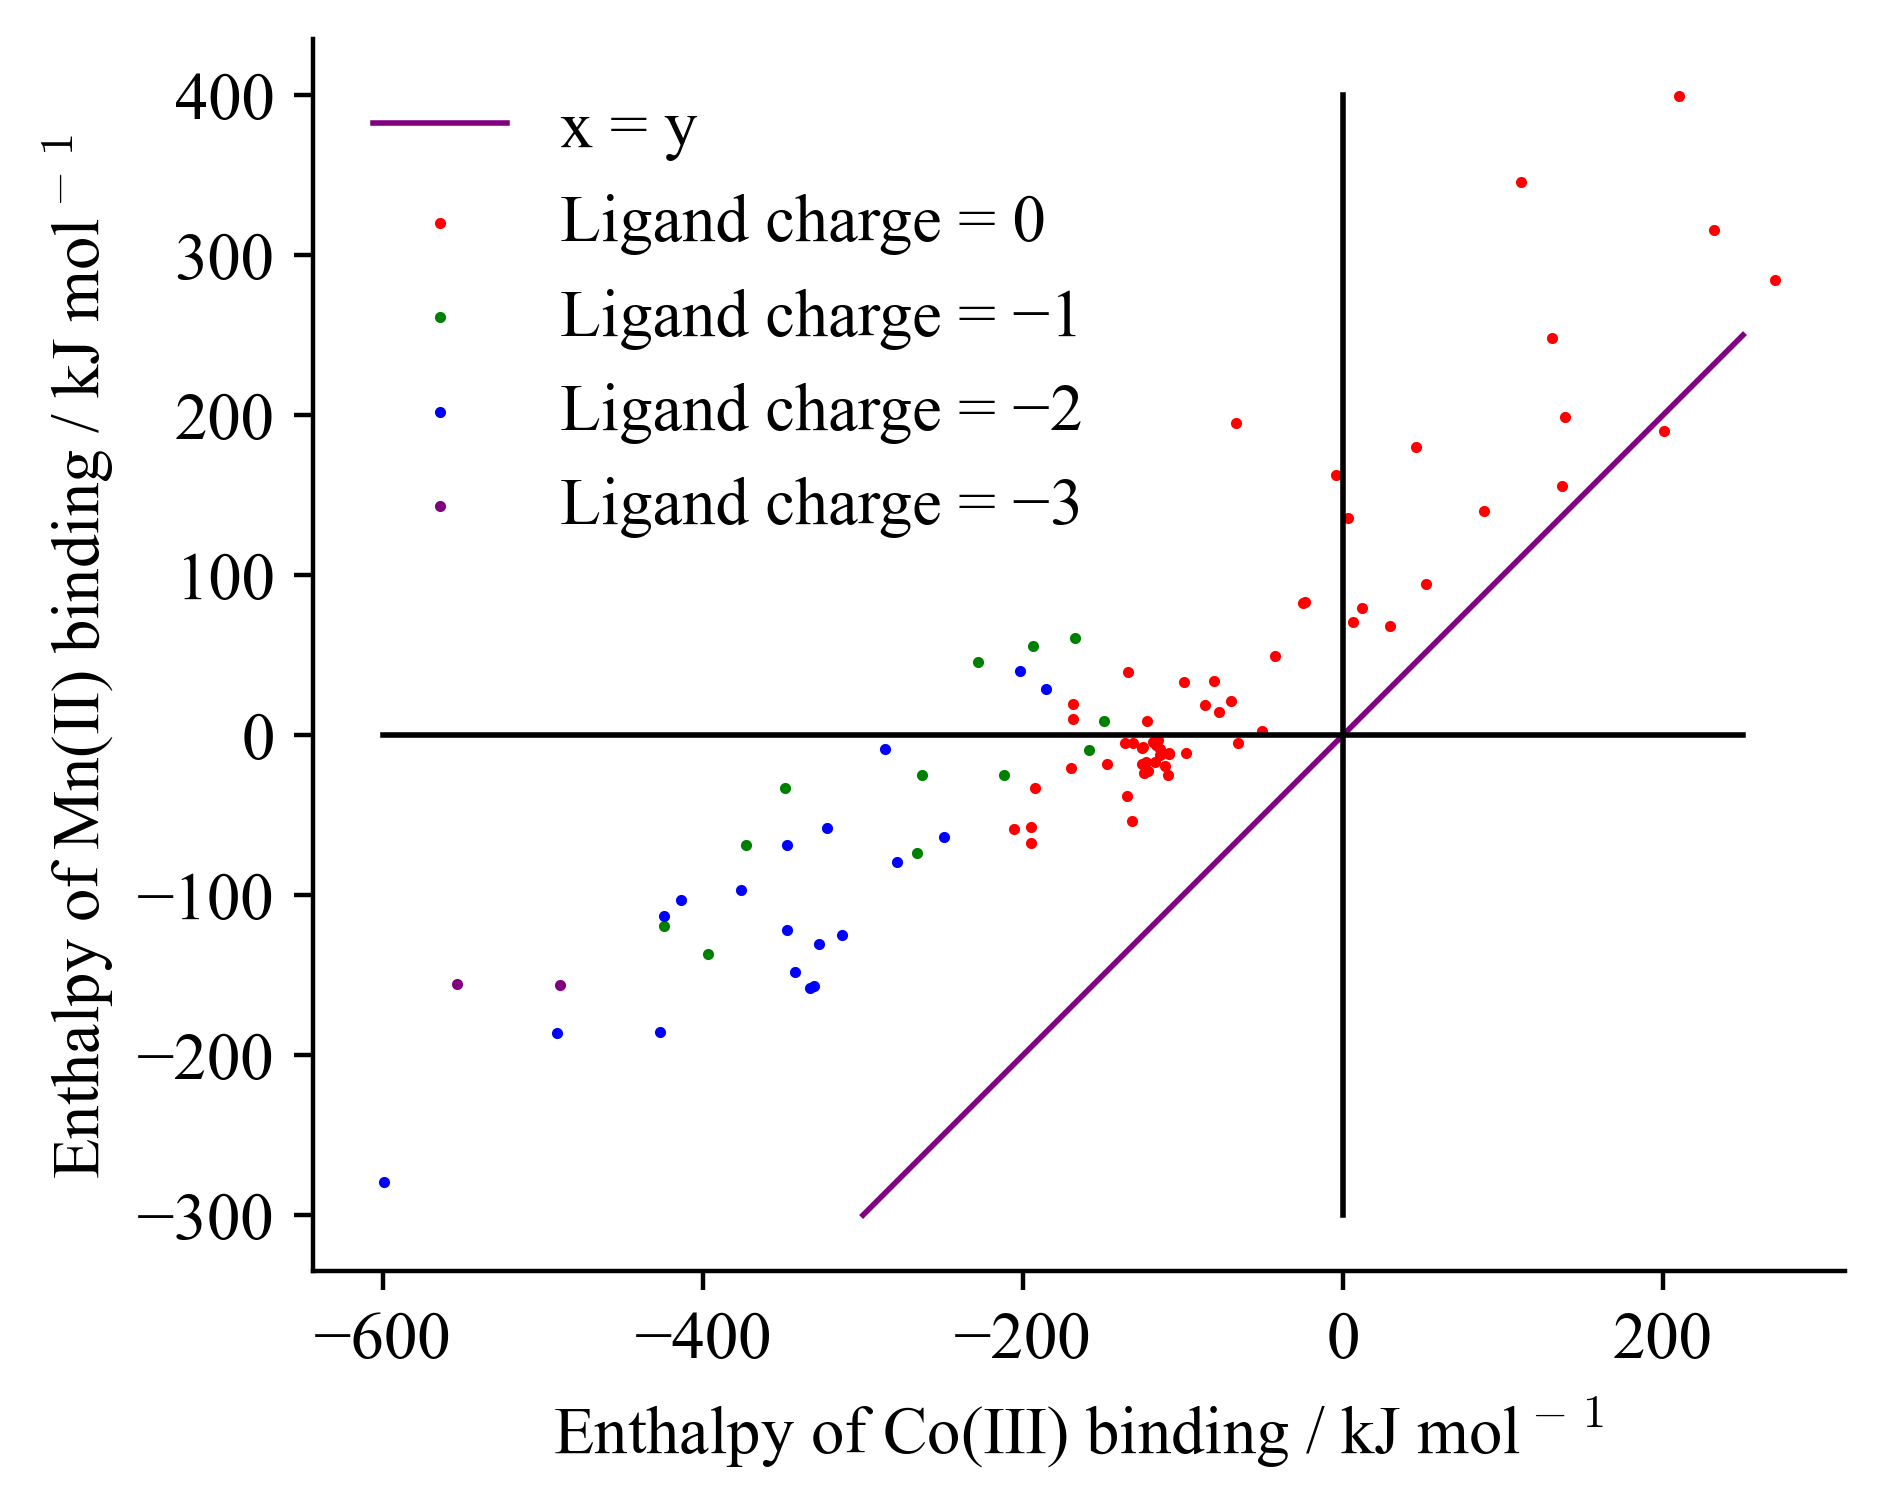

In [4]:
#Draw graph for xTB analysis
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
lig_charge_0 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == 0]
lig_charge_neg1 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == -1]
lig_charge_neg2 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == -2]
lig_charge_neg3 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == -3]
ax.plot([-300, 250],[-300,250], color='purple', label='x = y', linewidth=1)
ax.plot([0, 0], [-300, 400], color='k', linewidth=1)
ax.plot([-600, 250], [0,0], color='k', linewidth=1)
ax.scatter(lig_charge_0['xTB_Co_binding_enthalpy / kJ mol-1'], lig_charge_0['xTB_Mn_binding_enthalpy / kJ mol-1'], 1, color='r', label='Ligand charge = 0')
ax.scatter(lig_charge_neg1['xTB_Co_binding_enthalpy / kJ mol-1'], lig_charge_neg1['xTB_Mn_binding_enthalpy / kJ mol-1'], 1, color='g', label='Ligand charge = \N{MINUS SIGN}1')
ax.scatter(lig_charge_neg2['xTB_Co_binding_enthalpy / kJ mol-1'], lig_charge_neg2['xTB_Mn_binding_enthalpy / kJ mol-1'], 1, color='b', label='Ligand charge = \N{MINUS SIGN}2')
ax.scatter(lig_charge_neg3['xTB_Co_binding_enthalpy / kJ mol-1'], lig_charge_neg3['xTB_Mn_binding_enthalpy / kJ mol-1'], 1, color='purple', label='Ligand charge = \N{MINUS SIGN}3')
ax.legend(frameon=False)
ax.set_aspect('equal', 'box')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f'Enthalpy of Mn(II) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
ax.set_xlabel(f'Enthalpy of Co(III) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
plt.savefig(save_to_loc+'xTB_CoIII_MnII_enthalpy.png', bbox_inches='tight')


In [5]:
#TPSS/def2-TZVP analysis
TPSS_loc = 'C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/MnII_CoII/5_coor_ligands_v2/ORCA_Opt_Freq_Calcs/'
TPSS_CoIIIH2O6 = -1841.22644624
TPSS_MnIIH2O6 = -1609.736367822895
CoIIILig_df = pd.read_csv(TPSS_loc+'CoIIILigands.csv')
MnIILig_df = pd.read_csv(TPSS_loc+'MnIILigands.csv')
CoIIILig_df.dropna(inplace=True)
MnIILig_df.dropna(inplace=True)
MnII_7coor_id = pd.read_csv(TPSS_loc+'Mn_7coor_identifiers.csv')
CoIII_7coor_id = pd.read_csv(TPSS_loc+'Co_7coor_identifiers.csv')
CoIIILig_df = pd.merge(CoIIILig_df, CoIII_7coor_id, left_on='identifier', right_on='identifier', how='inner')
MnIILig_df = pd.merge(MnIILig_df, MnII_7coor_id, left_on='identifier', right_on='identifier', how='inner')
MnIILig_df.rename(columns={'single_point_energy':'TPSS_MnLig_en'}, inplace=True)
MnIILig_df.set_index('identifier', inplace=True)
MnIILig_df_TPSS = MnIILig_df
CoIIILig_df.rename(columns={'single_point_energy':'TPSS_CoLig_en'}, inplace=True)
CoIIILig_df.set_index('identifier', inplace=True)
CoIIILig_df_TPSS = CoIIILig_df
TPSS_enthalpy = pd.merge(MnIILig_df['TPSS_MnLig_en'], CoIIILig_df['TPSS_CoLig_en'], left_on='identifier', right_on='identifier', how='inner')
TPSS_enthalpy = pd.merge(TPSS_enthalpy, lig_df['xTB_Lig_en'], left_on='identifier', right_on='identifier', how='inner')
Co_water_num = pd.read_csv(TPSS_loc+'Co_HowManyWater.csv')
Co_water_num.rename(columns={'num_of_water_attached':'Co_water_num'}, inplace=True)
Co_water_num.set_index('identifier', inplace=True)
Co_water_num_TPSS = Co_water_num
Mn_water_num = pd.read_csv(TPSS_loc+'Mn_HowManyWater.csv')
Mn_water_num.rename(columns={'num_of_water_attached':'Mn_water_num'}, inplace=True)
Mn_water_num.set_index('identifier', inplace=True)
Mn_water_num_TPSS = Mn_water_num
TPSS_enthalpy = pd.merge(TPSS_enthalpy, Mn_water_num, left_on='identifier', right_on='identifier', how='inner')
TPSS_enthalpy = pd.merge(TPSS_enthalpy, Co_water_num, left_on='identifier', right_on='identifier', how='inner')
TPSS_enthalpy['TPSS_Co_binding_enthalpy'] = (TPSS_enthalpy['TPSS_CoLig_en']+(6-TPSS_enthalpy['Co_water_num'])*H2O_en)-(TPSS_enthalpy['xTB_Lig_en']+TPSS_CoIIIH2O6)
TPSS_enthalpy['TPSS_Mn_binding_enthalpy'] = (TPSS_enthalpy['TPSS_MnLig_en']+(6-TPSS_enthalpy['Mn_water_num'])*H2O_en)-(TPSS_enthalpy['xTB_Lig_en']+TPSS_MnIIH2O6)
TPSS_enthalpy['TPSS_Co_binding_enthalpy / kJ mol-1'] = TPSS_enthalpy['TPSS_Co_binding_enthalpy']*HF
TPSS_enthalpy['TPSS_Mn_binding_enthalpy / kJ mol-1'] = TPSS_enthalpy['TPSS_Mn_binding_enthalpy']*HF
TPSS_enthalpy = pd.merge(TPSS_enthalpy, lig_charge, left_on='identifier', right_on='identifier', how='inner')
TPSS_enthalpy['TPSS_enthalpy_difference_MnII-CoIII / kJ mol-1'] = TPSS_enthalpy['TPSS_Mn_binding_enthalpy / kJ mol-1'] - TPSS_enthalpy['TPSS_Co_binding_enthalpy / kJ mol-1']
TPSS_enthalpy.sort_values(by='TPSS_enthalpy_difference_MnII-CoIII / kJ mol-1', ascending=True, inplace=True)
CoIIILig_df_TPSS.shape

(21, 4)

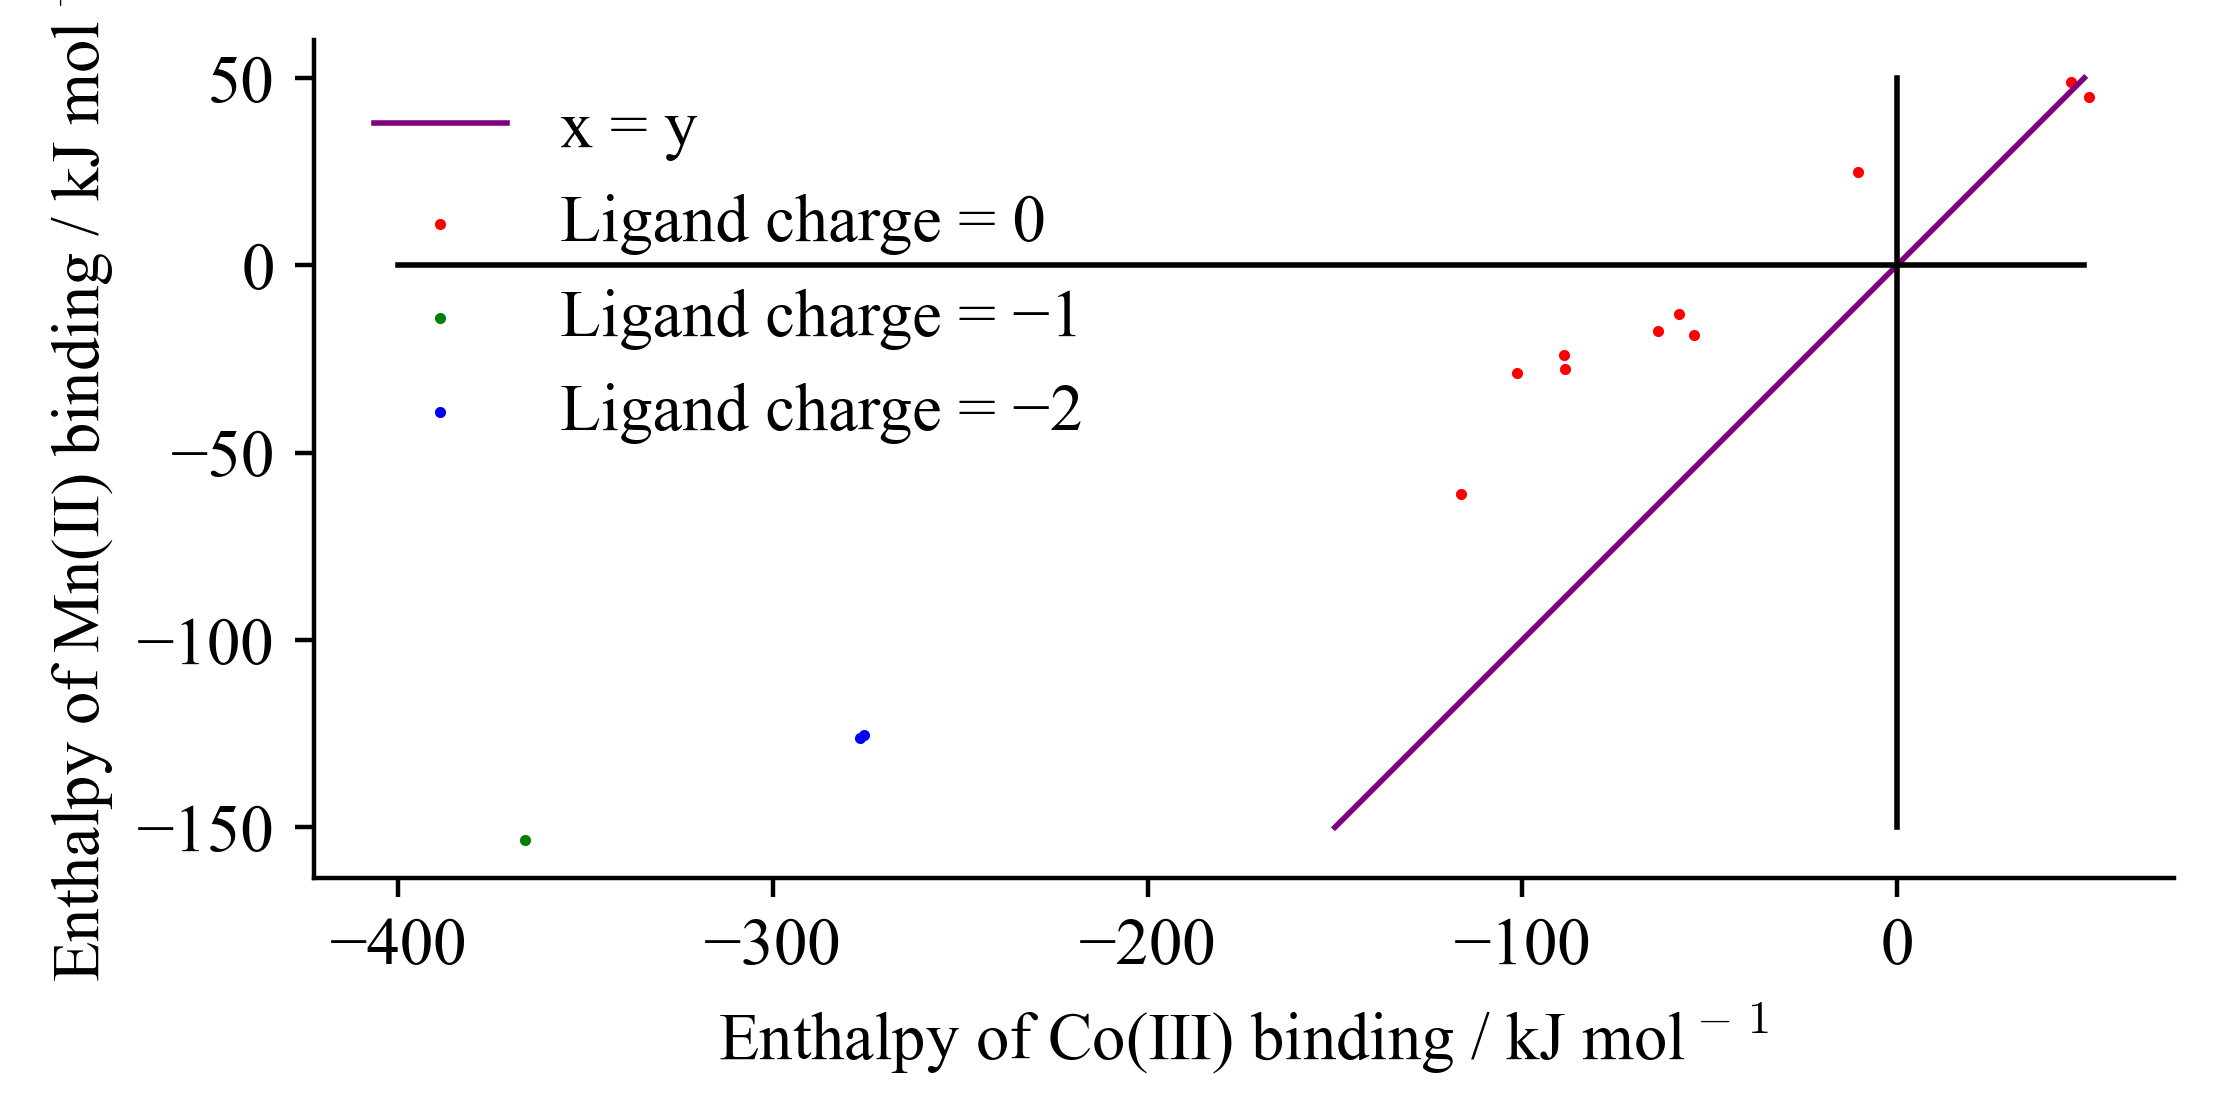

In [6]:
#TPSS/def2-TZVP graph
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
lig_charge_0 = TPSS_enthalpy[TPSS_enthalpy['ligand_charge'] == 0]
lig_charge_neg1 = TPSS_enthalpy[TPSS_enthalpy['ligand_charge'] == -1]
lig_charge_neg2 = TPSS_enthalpy[TPSS_enthalpy['ligand_charge'] == -2]
ax.plot([-150, 50], [-150, 50], color='purple', label='x = y', linewidth=1)
ax.plot([0, 0],[-150, 50], color='k', linewidth=1)
ax.plot([-400, 50],[0, 0], color='k', linewidth=1)
ax.scatter(lig_charge_0['TPSS_Co_binding_enthalpy / kJ mol-1'], lig_charge_0['TPSS_Mn_binding_enthalpy / kJ mol-1'], 1, color='r', label='Ligand charge = 0')
ax.scatter(lig_charge_neg1['TPSS_Co_binding_enthalpy / kJ mol-1'], lig_charge_neg1['TPSS_Mn_binding_enthalpy / kJ mol-1'], 1, color='g', label='Ligand charge = \N{MINUS SIGN}1')
ax.scatter(lig_charge_neg2['TPSS_Co_binding_enthalpy / kJ mol-1'], lig_charge_neg2['TPSS_Mn_binding_enthalpy / kJ mol-1'], 1, color='b', label='Ligand charge = \N{MINUS SIGN}2')
ax.legend(frameon=False)
ax.set_aspect('equal', 'box')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f'Enthalpy of Mn(II) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
ax.set_xlabel(f'Enthalpy of Co(III) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
plt.savefig(save_to_loc+'TPSS_CoIII_MnII_enthalpy.png', bbox_inches='tight')

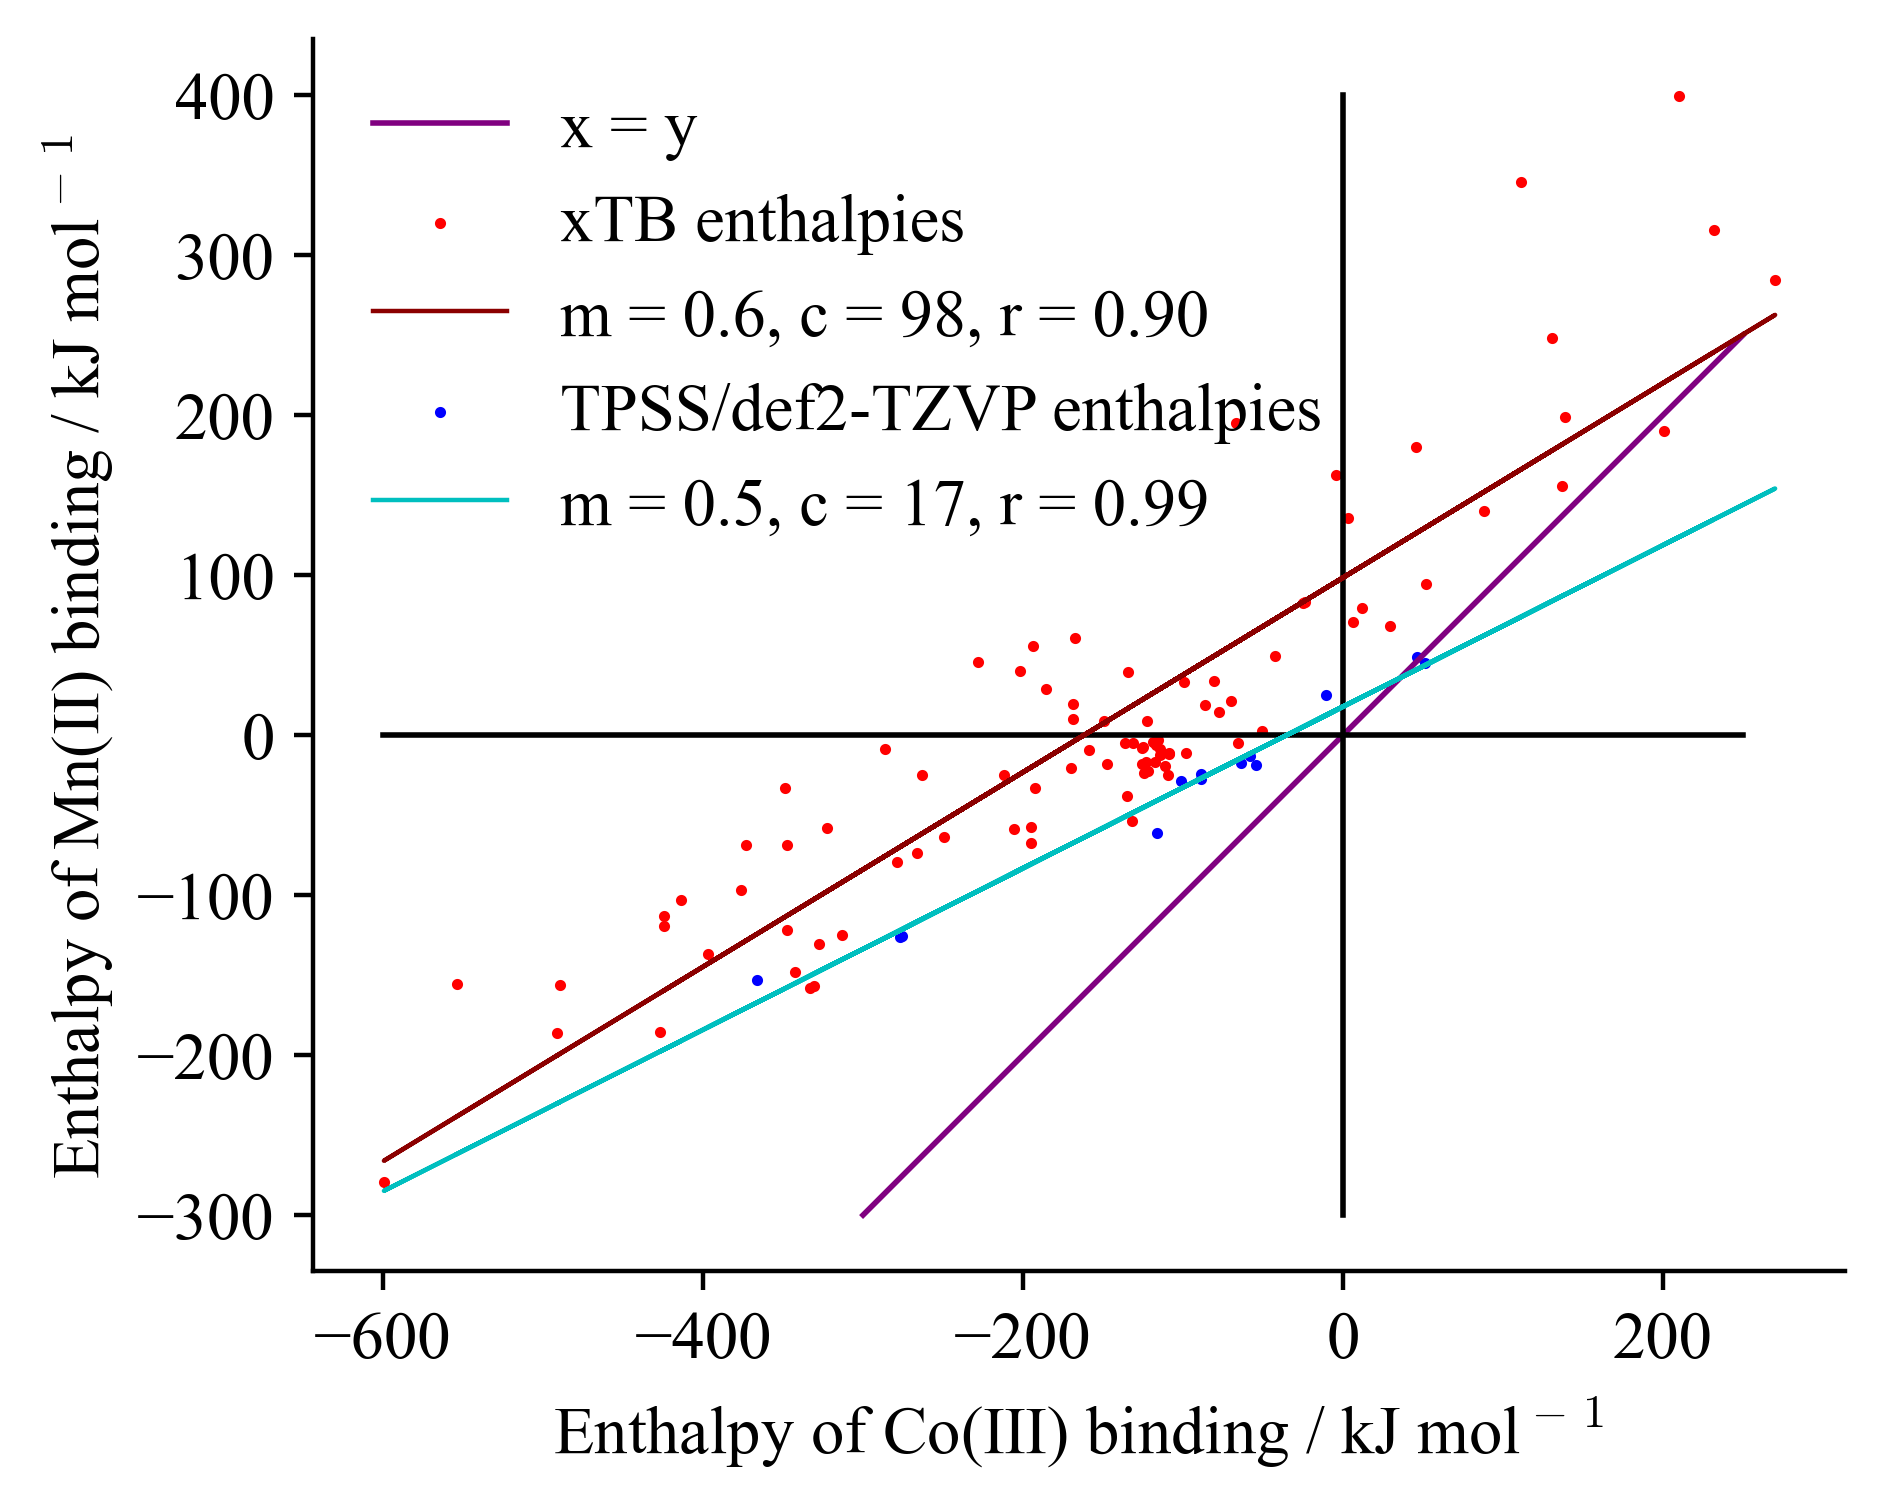

In [7]:
#compare TPSS and xTB trends
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
ax.plot([-300, 250],[-300,250], color='purple', label='x = y', linewidth=1)
ax.plot([0, 0], [-300, 400], color='k', linewidth=1)
ax.plot([-600, 250], [0,0], color='k', linewidth=1)
ax.scatter(xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1'], xTB_enthalpy['xTB_Mn_binding_enthalpy / kJ mol-1'], 1, color='r', label='xTB enthalpies')
m = scipy.stats.linregress(xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1'], xTB_enthalpy['xTB_Mn_binding_enthalpy / kJ mol-1'])
ax.plot(xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1'], m[0]*xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1']+m[1], linewidth=0.8, color='darkred', label='m = '+str(round(m[0], 1))+', c = '+str(int(m[1]))+', r = '+str(round(m[2], 2))+'0')
ax.scatter(TPSS_enthalpy['TPSS_Co_binding_enthalpy / kJ mol-1'], TPSS_enthalpy['TPSS_Mn_binding_enthalpy / kJ mol-1'], 1, color='b', label='TPSS/def2-TZVP enthalpies')
m = scipy.stats.linregress(TPSS_enthalpy['TPSS_Co_binding_enthalpy / kJ mol-1'], TPSS_enthalpy['TPSS_Mn_binding_enthalpy / kJ mol-1'])
ax.plot(xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1'], m[0]*xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1']+m[1], linewidth=0.8, color='c', label='m = '+str(round(m[0], 1))+', c = '+str(int(m[1]))+', r = '+str(round(m[2], 2)))
ax.legend(frameon=False)
ax.set_aspect('equal', 'box')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f'Enthalpy of Mn(II) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
ax.set_xlabel(f'Enthalpy of Co(III) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
plt.savefig(save_to_loc+'xTB_TPSS_CoIII_MnII_enthalpy.png', bbox_inches='tight')

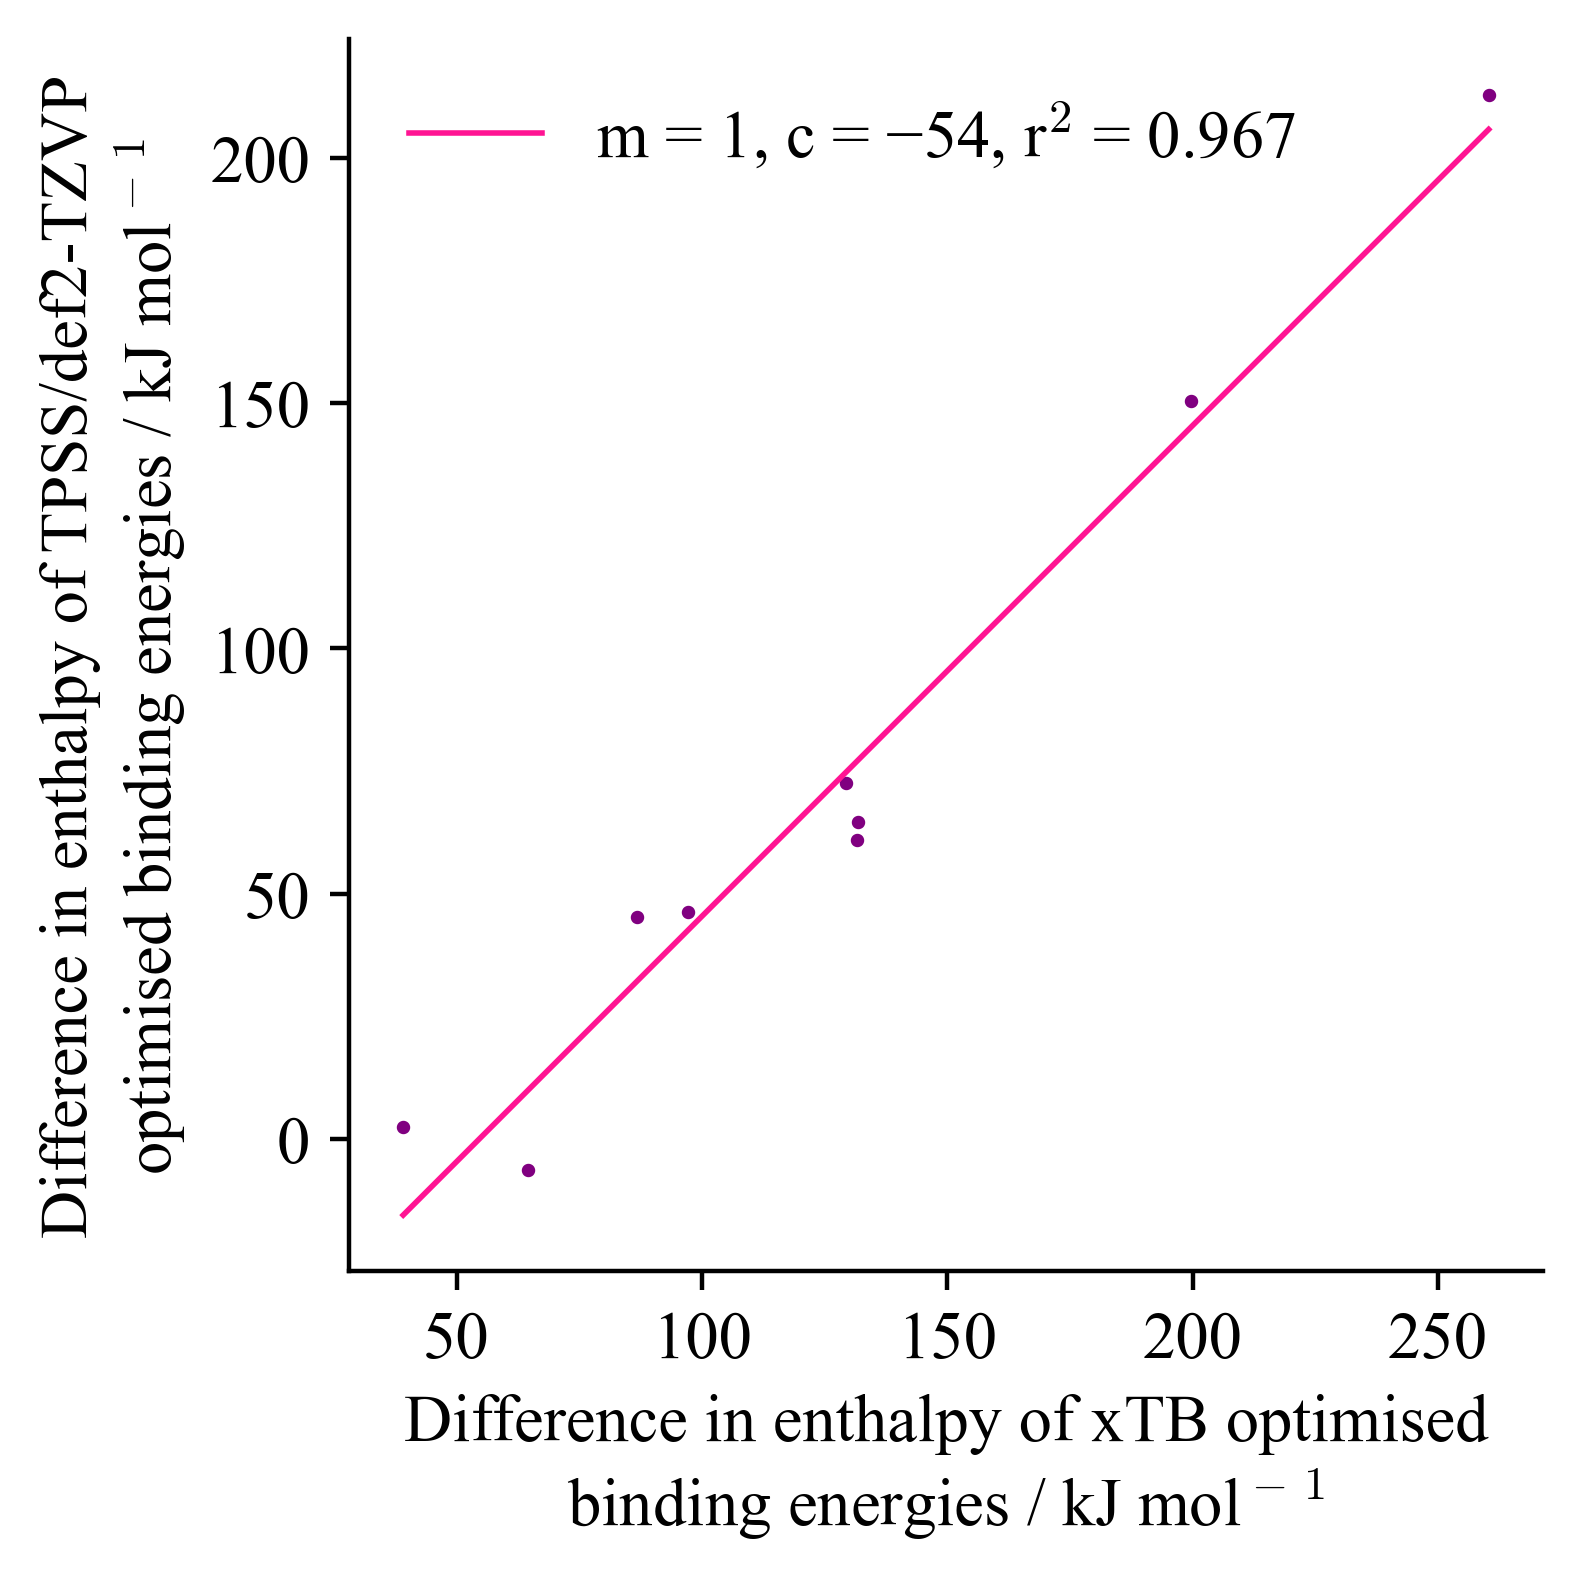

In [8]:
xTB_enthalpy['xTB_diff'] = xTB_enthalpy['xTB_Mn_binding_enthalpy / kJ mol-1'] - xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1']
TPSS_enthalpy['TPSS_diff'] = TPSS_enthalpy['TPSS_Mn_binding_enthalpy / kJ mol-1'] - TPSS_enthalpy['TPSS_Co_binding_enthalpy / kJ mol-1']
difference = pd.merge(xTB_enthalpy['xTB_diff'], TPSS_enthalpy['TPSS_diff'], left_on='identifier', right_on='identifier', how='inner')
Mn_enthalpy_comp = pd.merge(xTB_enthalpy['xTB_Mn_binding_enthalpy / kJ mol-1'], TPSS_enthalpy['TPSS_Mn_binding_enthalpy / kJ mol-1'], left_on='identifier', right_on='identifier', how='inner')
Co_enthalpy_comp = pd.merge(xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1'], TPSS_enthalpy['TPSS_Co_binding_enthalpy / kJ mol-1'], left_on='identifier', right_on='identifier', how='inner')
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
m = scipy.stats.linregress(difference['xTB_diff'], difference['TPSS_diff'])
ax.plot(difference['xTB_diff'], m[0]*difference['xTB_diff']+m[1], linewidth=1, color='deeppink', label='m = '+str(int(m[0]))+', c = \N{MINUS SIGN}'+str(abs(int(m[1])))+f', r$^2$ = '+str(round(m[2]**2, 3)))
ax.scatter(difference['xTB_diff'], difference['TPSS_diff'], 2, color='purple')
ax.legend(frameon=False)
ax.set_aspect('equal', 'box')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f'Difference in enthalpy of TPSS/def2-TZVP\noptimised binding energies / kJ mol$^\N{MINUS SIGN}$$^1$')
ax.set_xlabel(f'Difference in enthalpy of xTB optimised\nbinding energies / kJ mol$^\N{MINUS SIGN}$$^1$')
plt.savefig(save_to_loc+'TPSS_xTB_enthalpy_CoIII_MnII_diff.png', bbox_inches='tight')

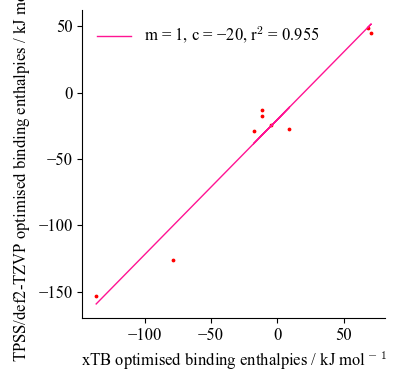

In [9]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
mcr = scipy.stats.linregress(Mn_enthalpy_comp['xTB_Mn_binding_enthalpy / kJ mol-1'], Mn_enthalpy_comp['TPSS_Mn_binding_enthalpy / kJ mol-1'])
ax.plot(Mn_enthalpy_comp['xTB_Mn_binding_enthalpy / kJ mol-1'], mcr[0]*Mn_enthalpy_comp['xTB_Mn_binding_enthalpy / kJ mol-1']+mcr[1], linewidth=1, color='deeppink', label='m = '+str(int(mcr[0]))+', c = \N{MINUS SIGN}'+str(abs(int(mcr[1])))+f', r$^2$ = '+str(round(mcr[2]**2, 3)))
ax.scatter(Mn_enthalpy_comp['xTB_Mn_binding_enthalpy / kJ mol-1'], Mn_enthalpy_comp['TPSS_Mn_binding_enthalpy / kJ mol-1'], 3, color='r')
ax.legend(frameon=False)
ax.set_aspect('equal', 'box')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f'TPSS/def2-TZVP optimised binding enthalpies / kJ mol$^\N{MINUS SIGN}$$^1$')
ax.set_xlabel(f'xTB optimised binding enthalpies / kJ mol$^\N{MINUS SIGN}$$^1$')
Mn_m_correction = mcr[0]
Mn_c_correction = mcr[1]

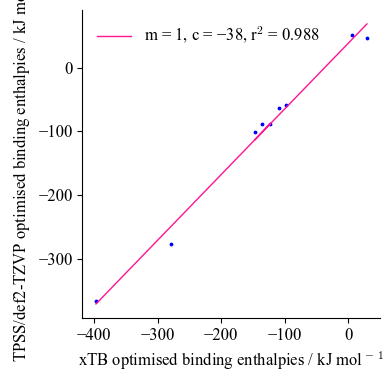

In [10]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
mcr = scipy.stats.linregress(Co_enthalpy_comp['xTB_Co_binding_enthalpy / kJ mol-1'], Co_enthalpy_comp['TPSS_Co_binding_enthalpy / kJ mol-1'])
ax.plot(Co_enthalpy_comp['xTB_Co_binding_enthalpy / kJ mol-1'], mcr[0]*Co_enthalpy_comp['xTB_Co_binding_enthalpy / kJ mol-1']+mcr[1], linewidth=1, color='deeppink', label='m = '+str(int(mcr[0]))+', c = \N{MINUS SIGN}'+str(abs(int(mcr[1])))+f', r$^2$ = '+str(round(mcr[2]**2, 3)))
ax.scatter(Co_enthalpy_comp['xTB_Co_binding_enthalpy / kJ mol-1'], Co_enthalpy_comp['TPSS_Co_binding_enthalpy / kJ mol-1'], 3, color='b')
ax.legend(frameon=False)
ax.set_aspect('equal', 'box')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f'TPSS/def2-TZVP optimised binding enthalpies / kJ mol$^\N{MINUS SIGN}$$^1$')
ax.set_xlabel(f'xTB optimised binding enthalpies / kJ mol$^\N{MINUS SIGN}$$^1$')
Co_m_correction = mcr[0]
Co_c_correction = mcr[1]

In [11]:
MnII_TPSS_enthalpy = pd.merge(MnIILig_df_TPSS['TPSS_MnLig_en'], Mn_water_num_TPSS, left_on='identifier', right_on='identifier', how='inner')
MnII_TPSS_enthalpy = pd.merge(MnII_TPSS_enthalpy, lig_df['xTB_Lig_en'], left_on='identifier', right_on='identifier', how='inner')
MnII_TPSS_enthalpy['Mn_TPSS_enthalpy / kJ mol-1'] = ((MnII_TPSS_enthalpy['TPSS_MnLig_en']+(6-MnII_TPSS_enthalpy['Mn_water_num'])*H2O_en)-(MnIIH2O6+MnII_TPSS_enthalpy['xTB_Lig_en']))*HF
CoIII_TPSS_enthalpy = pd.merge(CoIIILig_df_TPSS['TPSS_CoLig_en'], Co_water_num_TPSS, left_on='identifier', right_on='identifier', how='inner')
CoIII_TPSS_enthalpy = pd.merge(CoIII_TPSS_enthalpy, lig_df['xTB_Lig_en'], left_on='identifier', right_on='identifier', how='inner')
CoIII_TPSS_enthalpy['Co_TPSS_enthalpy / kJ mol-1'] = ((CoIII_TPSS_enthalpy['TPSS_CoLig_en']+(6-CoIII_TPSS_enthalpy['Co_water_num'])*H2O_en)-(CoIIIH2O6+CoIII_TPSS_enthalpy['xTB_Lig_en']))*HF
Mn_xTB_vs_TPSS = pd.merge(Mn_xTB_enthalpy['Mn_xTB_enthalpy / kJ mol-1'], MnII_TPSS_enthalpy['Mn_TPSS_enthalpy / kJ mol-1'], left_on='identifier', right_on='identifier', how='inner')
Co_xTB_vs_TPSS = pd.merge(Co_xTB_enthalpy['Co_xTB_enthalpy / kJ mol-1'], CoIII_TPSS_enthalpy['Co_TPSS_enthalpy / kJ mol-1'], left_on='identifier', right_on='identifier', how='inner')
Co_xTB_vs_TPSS

,Co_xTB_enthalpy / kJ mol-1,Co_TPSS_enthalpy / kJ mol-1
identifier,,
GEPYIJ10_NS,-412.311295,-484.205132
IPIRAC_3_m_NS,-108.712191,-142.988611
JUJVIT_1_NS,-396.936198,-445.404173
KOWJOV_1_m_NS,-122.589205,-167.784093
NUNTAR_2_m_NS,-278.678064,-356.021553
PAXJII_1_NS,-136.465887,-168.045937
POSBOO_1_NS,29.228958,-32.764743
POXTRA10_1_NS,6.092611,-28.020461
YIKNAH_1_m_NS,-147.266306,-180.599718


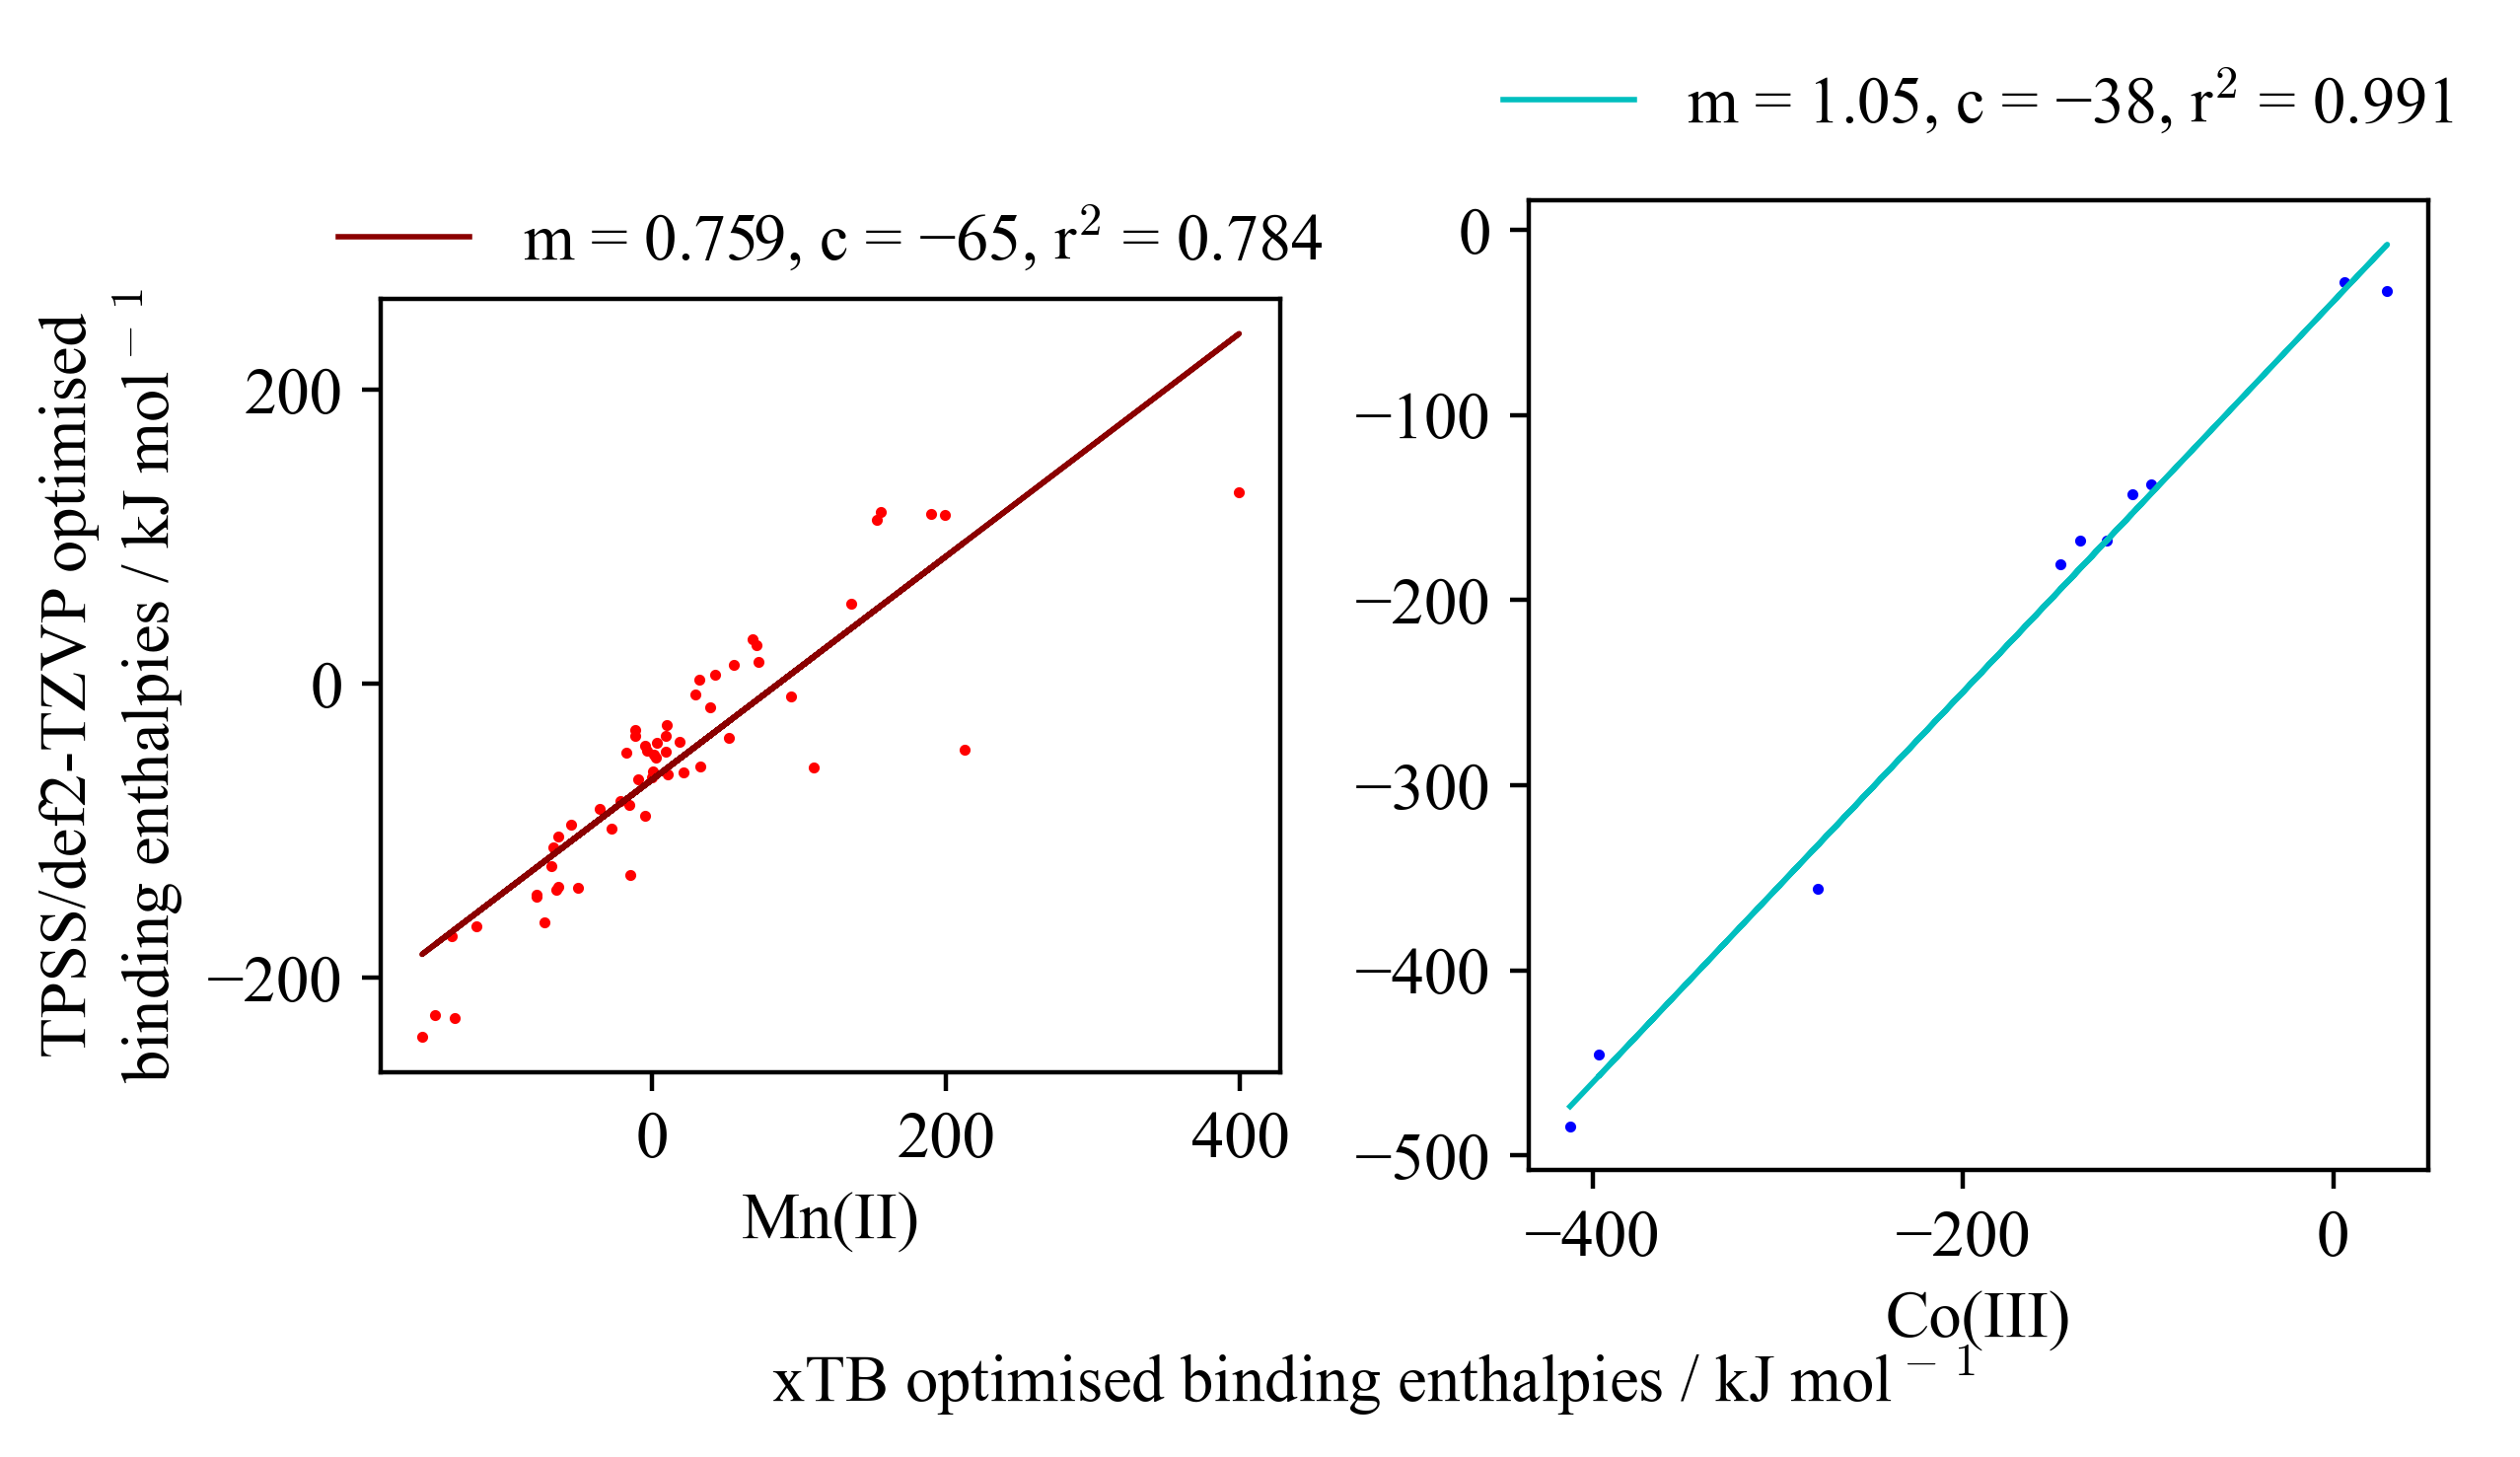

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(6,4), dpi=400)
fig.tight_layout()

mcr = scipy.stats.linregress(Mn_xTB_vs_TPSS['Mn_xTB_enthalpy / kJ mol-1'], Mn_xTB_vs_TPSS['Mn_TPSS_enthalpy / kJ mol-1'])
ax[0].plot(Mn_xTB_vs_TPSS['Mn_xTB_enthalpy / kJ mol-1'], mcr[0]*Mn_xTB_vs_TPSS['Mn_xTB_enthalpy / kJ mol-1']+mcr[1], linewidth=1, color='darkred', label='m = '+str(round(mcr[0], 3))+', c = \N{MINUS SIGN}'+str(abs(int(mcr[1])))+f', r$^2$ = '+str(round(mcr[2]**2, 3)))
ax[0].scatter(Mn_xTB_vs_TPSS['Mn_xTB_enthalpy / kJ mol-1'], Mn_xTB_vs_TPSS['Mn_TPSS_enthalpy / kJ mol-1'], 1, color='r')
ax[0].set_aspect('equal', 'box')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=False)
Mn_m_correction = mcr[0]
Mn_c_correction = mcr[1]

mcr = scipy.stats.linregress(Co_xTB_vs_TPSS['Co_xTB_enthalpy / kJ mol-1'], Co_xTB_vs_TPSS['Co_TPSS_enthalpy / kJ mol-1'])
ax[1].plot(Co_xTB_vs_TPSS['Co_xTB_enthalpy / kJ mol-1'], mcr[0]*Co_xTB_vs_TPSS['Co_xTB_enthalpy / kJ mol-1']+mcr[1], linewidth=1, color='c', label='m = '+str(round(mcr[0], 2))+', c = \N{MINUS SIGN}'+str(abs(int(mcr[1])))+f', r$^2$ = '+str(round(mcr[2]**2, 3)))
ax[1].scatter(Co_xTB_vs_TPSS['Co_xTB_enthalpy / kJ mol-1'], Co_xTB_vs_TPSS['Co_TPSS_enthalpy / kJ mol-1'], 1, color='b')
ax[1].set_aspect('equal', 'box')
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=False)
Co_m_correction = mcr[0]
Co_c_correction = mcr[1]
ax[0].set_ylabel(f'TPSS/def2-TZVP optimised\nbinding enthalpies / kJ mol$^\N{MINUS SIGN}$$^1$')

ax[0].set_xlabel('Mn(II)')
ax[1].set_xlabel('Co(III)')
fig.text(0.5, 0.07, f'xTB optimised binding enthalpies / kJ mol$^\N{MINUS SIGN}$$^1$', ha='center')
plt.savefig(save_to_loc+'linear_calibration_for_xTB.png', bbox_inches='tight')

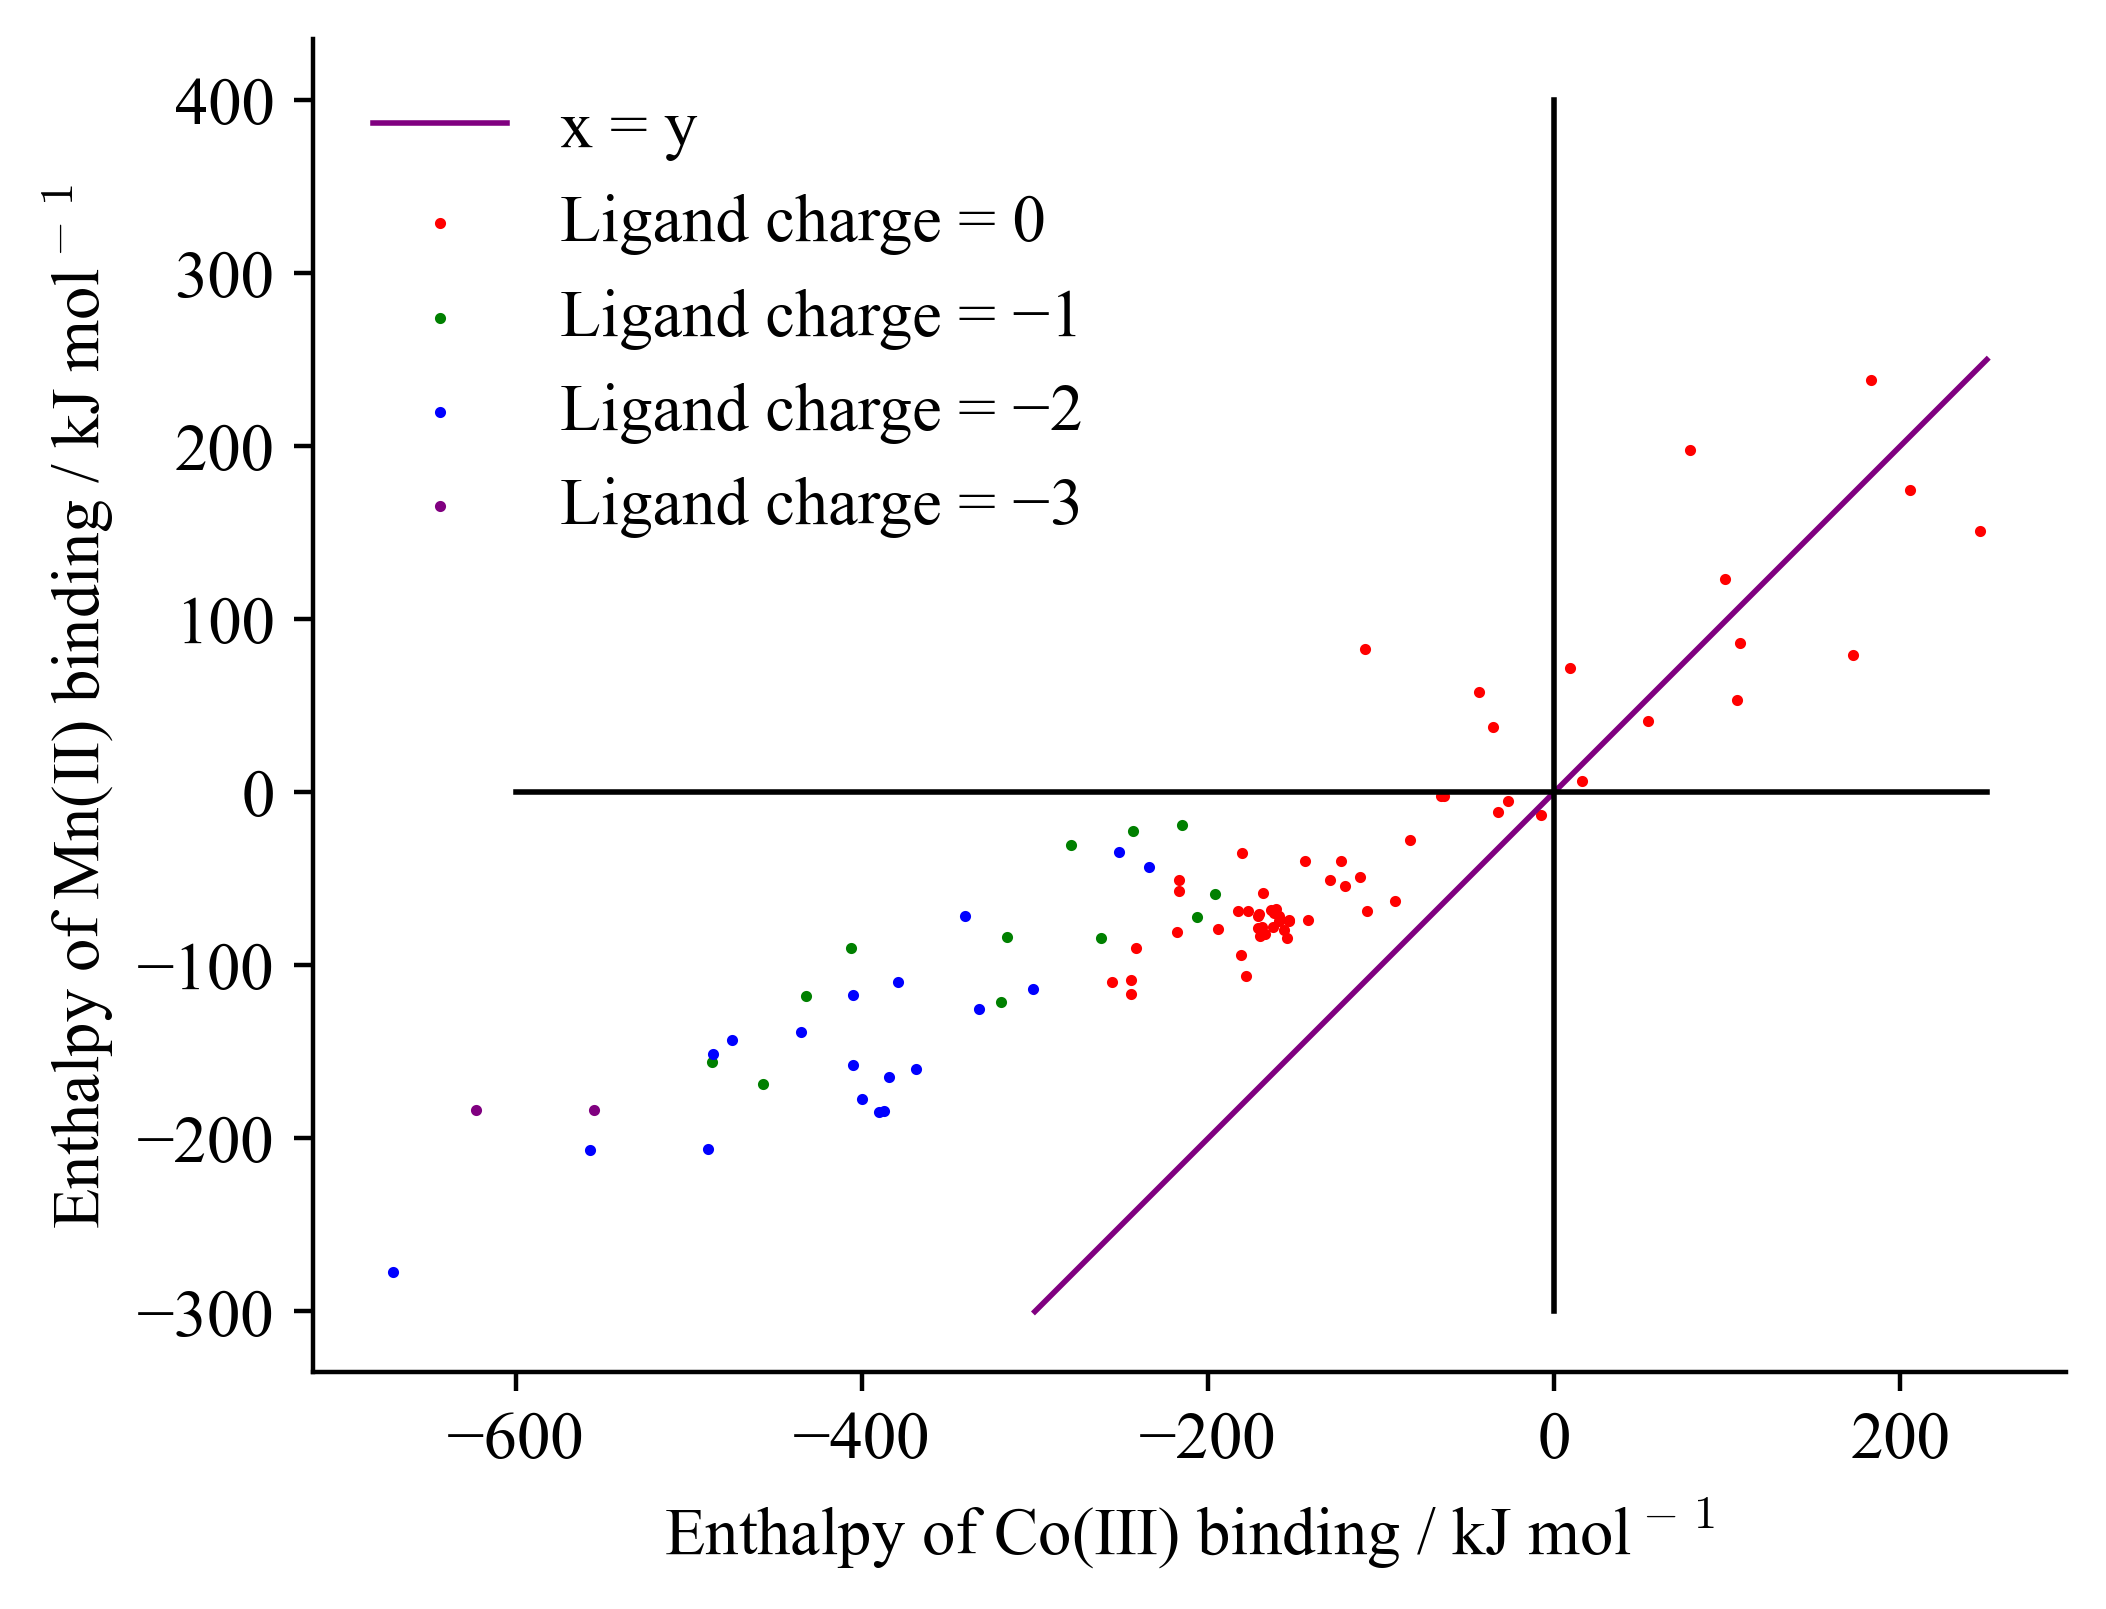

In [13]:
#apply corrections to xTB graph and then replot xTB enthalpies
xTB_enthalpy['xTB_corrected_Mn_enthalpy / kJ mol-1'] = Mn_m_correction*xTB_enthalpy['xTB_Mn_binding_enthalpy / kJ mol-1']+Mn_c_correction
xTB_enthalpy['xTB_corrected_Co_enthalpy / kJ mol-1'] = Co_m_correction*xTB_enthalpy['xTB_Co_binding_enthalpy / kJ mol-1']+Co_c_correction
xTB_enthalpy['xTB_corrected_enthalpy_difference_MnII-CoIII / kJ mol-1'] = xTB_enthalpy['xTB_corrected_Mn_enthalpy / kJ mol-1'] - xTB_enthalpy['xTB_corrected_Co_enthalpy / kJ mol-1']
xTB_enthalpy.sort_values(by='xTB_corrected_enthalpy_difference_MnII-CoIII / kJ mol-1', ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(6,4), dpi=400)
fig.tight_layout()
lig_charge_0 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == 0]
lig_charge_neg1 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == -1]
lig_charge_neg2 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == -2]
lig_charge_neg3 = xTB_enthalpy[xTB_enthalpy['ligand_charge'] == -3]
ax.plot([-300, 250],[-300,250], color='purple', label='x = y', linewidth=1)
ax.plot([0, 0], [-300, 400], color='k', linewidth=1)
ax.plot([-600, 250], [0,0], color='k', linewidth=1)
ax.scatter(lig_charge_0['xTB_corrected_Co_enthalpy / kJ mol-1'], lig_charge_0['xTB_corrected_Mn_enthalpy / kJ mol-1'], 1, color='r', label='Ligand charge = 0')
ax.scatter(lig_charge_neg1['xTB_corrected_Co_enthalpy / kJ mol-1'], lig_charge_neg1['xTB_corrected_Mn_enthalpy / kJ mol-1'], 1, color='g', label='Ligand charge = \N{MINUS SIGN}1')
ax.scatter(lig_charge_neg2['xTB_corrected_Co_enthalpy / kJ mol-1'], lig_charge_neg2['xTB_corrected_Mn_enthalpy / kJ mol-1'], 1, color='b', label='Ligand charge = \N{MINUS SIGN}2')
ax.scatter(lig_charge_neg3['xTB_corrected_Co_enthalpy / kJ mol-1'], lig_charge_neg3['xTB_corrected_Mn_enthalpy / kJ mol-1'], 1, color='purple', label='Ligand charge = \N{MINUS SIGN}3')
ax.legend(frameon=False)
ax.set_aspect('equal', 'box')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel(f'Enthalpy of Mn(II) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
ax.set_xlabel(f'Enthalpy of Co(III) binding / kJ mol$^\N{MINUS SIGN}$$^1$')
plt.savefig(save_to_loc+'xTB_calibrated_CoIII_MnII_enthalpy.png', bbox_inches='tight')

In [14]:
xTB_enthalpy.to_csv(xTB_loc+'Results.csv')
#xTB_enthalpy.drop(columns=['xTB_diff'])
xTB_enthalpy

,xTB_Lig_en,xTB_CoLig_en,xTB_MnLig_en,num_of_water_attached,SMILES_string,xTB_Mn_binding_enthalpy,xTB_Mn_binding_enthalpy / kJ mol-1,xTB_Co_binding_enthalpy,xTB_Co_binding_enthalpy / kJ mol-1,ligand_charge,xTB_enthalpy_difference_MnII-CoIII / kJ mol-1,xTB_diff,xTB_corrected_Mn_enthalpy / kJ mol-1,xTB_corrected_Co_enthalpy / kJ mol-1,xTB_corrected_enthalpy_difference_MnII-CoIII / kJ mol-1
identifier,,,,,,,,,,,,,,,
RITNEO_1_N,-1604.006638,-3062.723752,-2831.251381,1,CC1OC(=O)C(C)OC(=O)C(C)OC(=O)C(C)OC(=O)C(C)OC(...,0.108345,284.460406,0.102859,270.055349,0,14.405057,14.405057,150.978562,246.123091,-95.144529
RIQVAP_2_NS,-1367.992255,-2903.211170,-2671.748323,2,O=C1COC(=O)COC(=O)COC(=O)COC(=O)COC(=O)CO1,0.072276,189.761756,0.076313,200.360945,0,-10.599189,-10.599189,79.059972,172.625352,-93.565380
TERDEA_2_NS,-1604.009917,-3139.252979,-2907.778944,2,CC1OC(=O)C(C)OC(=O)C(C)OC(=O)C(C)OC(=O)C(C)OC(...,0.059317,155.737804,0.052166,136.961990,0,18.775814,18.775814,53.220589,105.766614,-52.546024
TERDEA_1_S,-1603.995860,-3062.727641,-2831.228834,1,CC1OC(=O)C(C)OC(=O)C(C)OC(=O)C(C)OC(=O)C(C)OC(...,0.120116,315.363461,0.088192,231.547823,0,83.815638,83.815638,174.447790,205.514148,-31.066358
POXTRA10_3_NS,-991.826146,-2527.068611,-2295.578725,2,O=C1COCC(=O)OCC(=O)OCCOCCO1,0.075766,198.924595,0.052764,138.531233,0,60.393362,60.393362,86.018661,107.421493,-21.402832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FATBAF_2_m_N,-2891.660311,-4350.641815,-4119.056530,1,COC1CCC(OC1C)OC1CC(OC2(OC(CC2C)C2OC(O)(CO)C(C)...,-0.043130,-113.236575,-0.161532,-424.101040,-2,310.864465,310.864465,-151.051152,-485.914528,334.863376
KAHSOB_4_m_NS,-2790.689237,-4326.171630,-4094.588620,2,CCC1(CCC(O1)C1(C)CCC2(CC(O)C(C)C(O2)C(C)C(OC)C...,-0.071038,-186.511323,-0.187165,-491.402144,-2,304.890821,304.890821,-206.699428,-556.888362,350.188934
FATBAF_3_m_N,-2891.150071,-4350.156479,-4118.562687,1,COC1CCC(OC1C)OC1CC(OC2(OC(CC2C)C2OC([O-])(C[O-...,-0.059526,-156.286646,-0.186435,-489.485490,-3,333.198844,333.198844,-183.745393,-554.867113,371.121720


In [15]:
'''
yml_config_file_path = 'C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/MnII_CoII/airzynthfinder/config.yml'
import aizynthfinder.aizynthfinder as az
finder = az.AiZynthFinder(yml_config_file_path)
finder.stock.select('zinc')
finder.expansion_policy.select('uspto')
finder.filter_policy.select('uspto')
finder.target_smiles = 'CCOC(NCCOCCOCCNC(OCC)=NC(=O)c1ccccc1)=NC(=O)c1ccccc1'
finder.tree_search()
finder.build_routes()
stats = finder.extract_statistics()
finder.analysis.tree_statistics()
from aizynthfinder.interfaces import AiZynthApp
app = AiZynthApp(yml_config_file_path)
'''

"\nyml_config_file_path = 'C:/Users/cmsma/OneDrive - University of Leeds/Samuel Mace PhD Project/MnII_CoII/airzynthfinder/config.yml'\nimport aizynthfinder.aizynthfinder as az\nfinder = az.AiZynthFinder(yml_config_file_path)\nfinder.stock.select('zinc')\nfinder.expansion_policy.select('uspto')\nfinder.filter_policy.select('uspto')\nfinder.target_smiles = 'CCOC(NCCOCCOCCNC(OCC)=NC(=O)c1ccccc1)=NC(=O)c1ccccc1'\nfinder.tree_search()\nfinder.build_routes()\nstats = finder.extract_statistics()\nfinder.analysis.tree_statistics()\nfrom aizynthfinder.interfaces import AiZynthApp\napp = AiZynthApp(yml_config_file_path)\n"

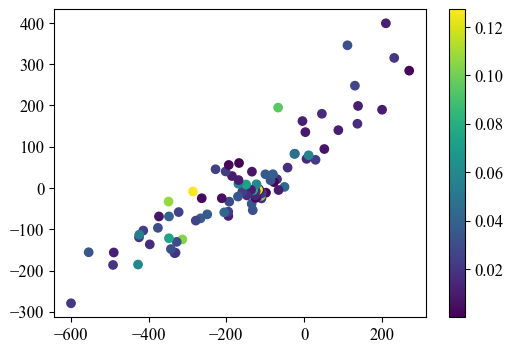

In [16]:

Co_xTB_pg = pd.read_csv(xTB_loc+'Co_xTB_pg_dev.csv')
Co_xTB_pg.set_index('identifier', inplace=True)
Mn_xTB_pg = pd.read_csv(xTB_loc+'Mn_7_coor_pg_dev_XTBOutput.csv')
Mn_xTB_pg.set_index('identifier', inplace=True)
xTB_enthalpy_pg = pd.merge(xTB_enthalpy[['xTB_Mn_binding_enthalpy / kJ mol-1', 'xTB_Co_binding_enthalpy / kJ mol-1']], Co_xTB_pg, left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy_pg = pd.merge(xTB_enthalpy_pg, Mn_xTB_pg, left_on='identifier', right_on='identifier', how='inner')
xTB_enthalpy_pg
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
im = ax.scatter(xTB_enthalpy_pg['xTB_Co_binding_enthalpy / kJ mol-1'], xTB_enthalpy_pg['xTB_Mn_binding_enthalpy / kJ mol-1'], c=abs(xTB_enthalpy_pg['Co_xTB_D5h']-xTB_enthalpy_pg['Mn_xTB_D5h']))
fig.colorbar(im, ax=ax)

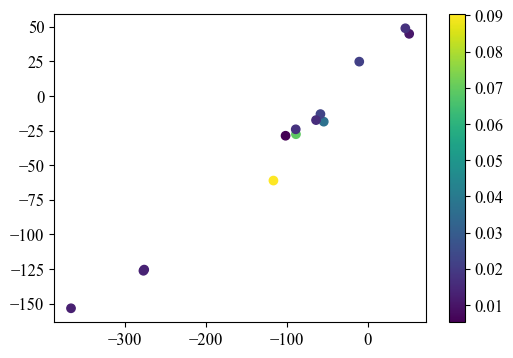

In [17]:
Co_TPSS_pg = pd.read_csv(TPSS_loc+'Co_pg_dev.csv')
Co_TPSS_pg.set_index('identifier', inplace=True)
Mn_TPSS_pg = pd.read_csv(TPSS_loc+'Mn_pg_dev.csv')
Mn_TPSS_pg.set_index('identifier', inplace=True)
Mn_Co_TPSS_pg = pd.merge(Mn_TPSS_pg, Co_TPSS_pg, left_on='identifier', right_on='identifier', how='inner')
TPSS_enthalpy_pg = pd.merge(TPSS_enthalpy[['TPSS_Mn_binding_enthalpy / kJ mol-1', 'TPSS_Co_binding_enthalpy / kJ mol-1']], Mn_Co_TPSS_pg, left_on='identifier', right_on='identifier', how='inner')
TPSS_enthalpy_pg
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
im = ax.scatter(TPSS_enthalpy_pg['TPSS_Co_binding_enthalpy / kJ mol-1'], TPSS_enthalpy_pg['TPSS_Mn_binding_enthalpy / kJ mol-1'], c=TPSS_enthalpy_pg['Co_ORCA_D5h'])
fig.colorbar(im, ax=ax)

[0.02497194579415099, 0.050449908308460786]


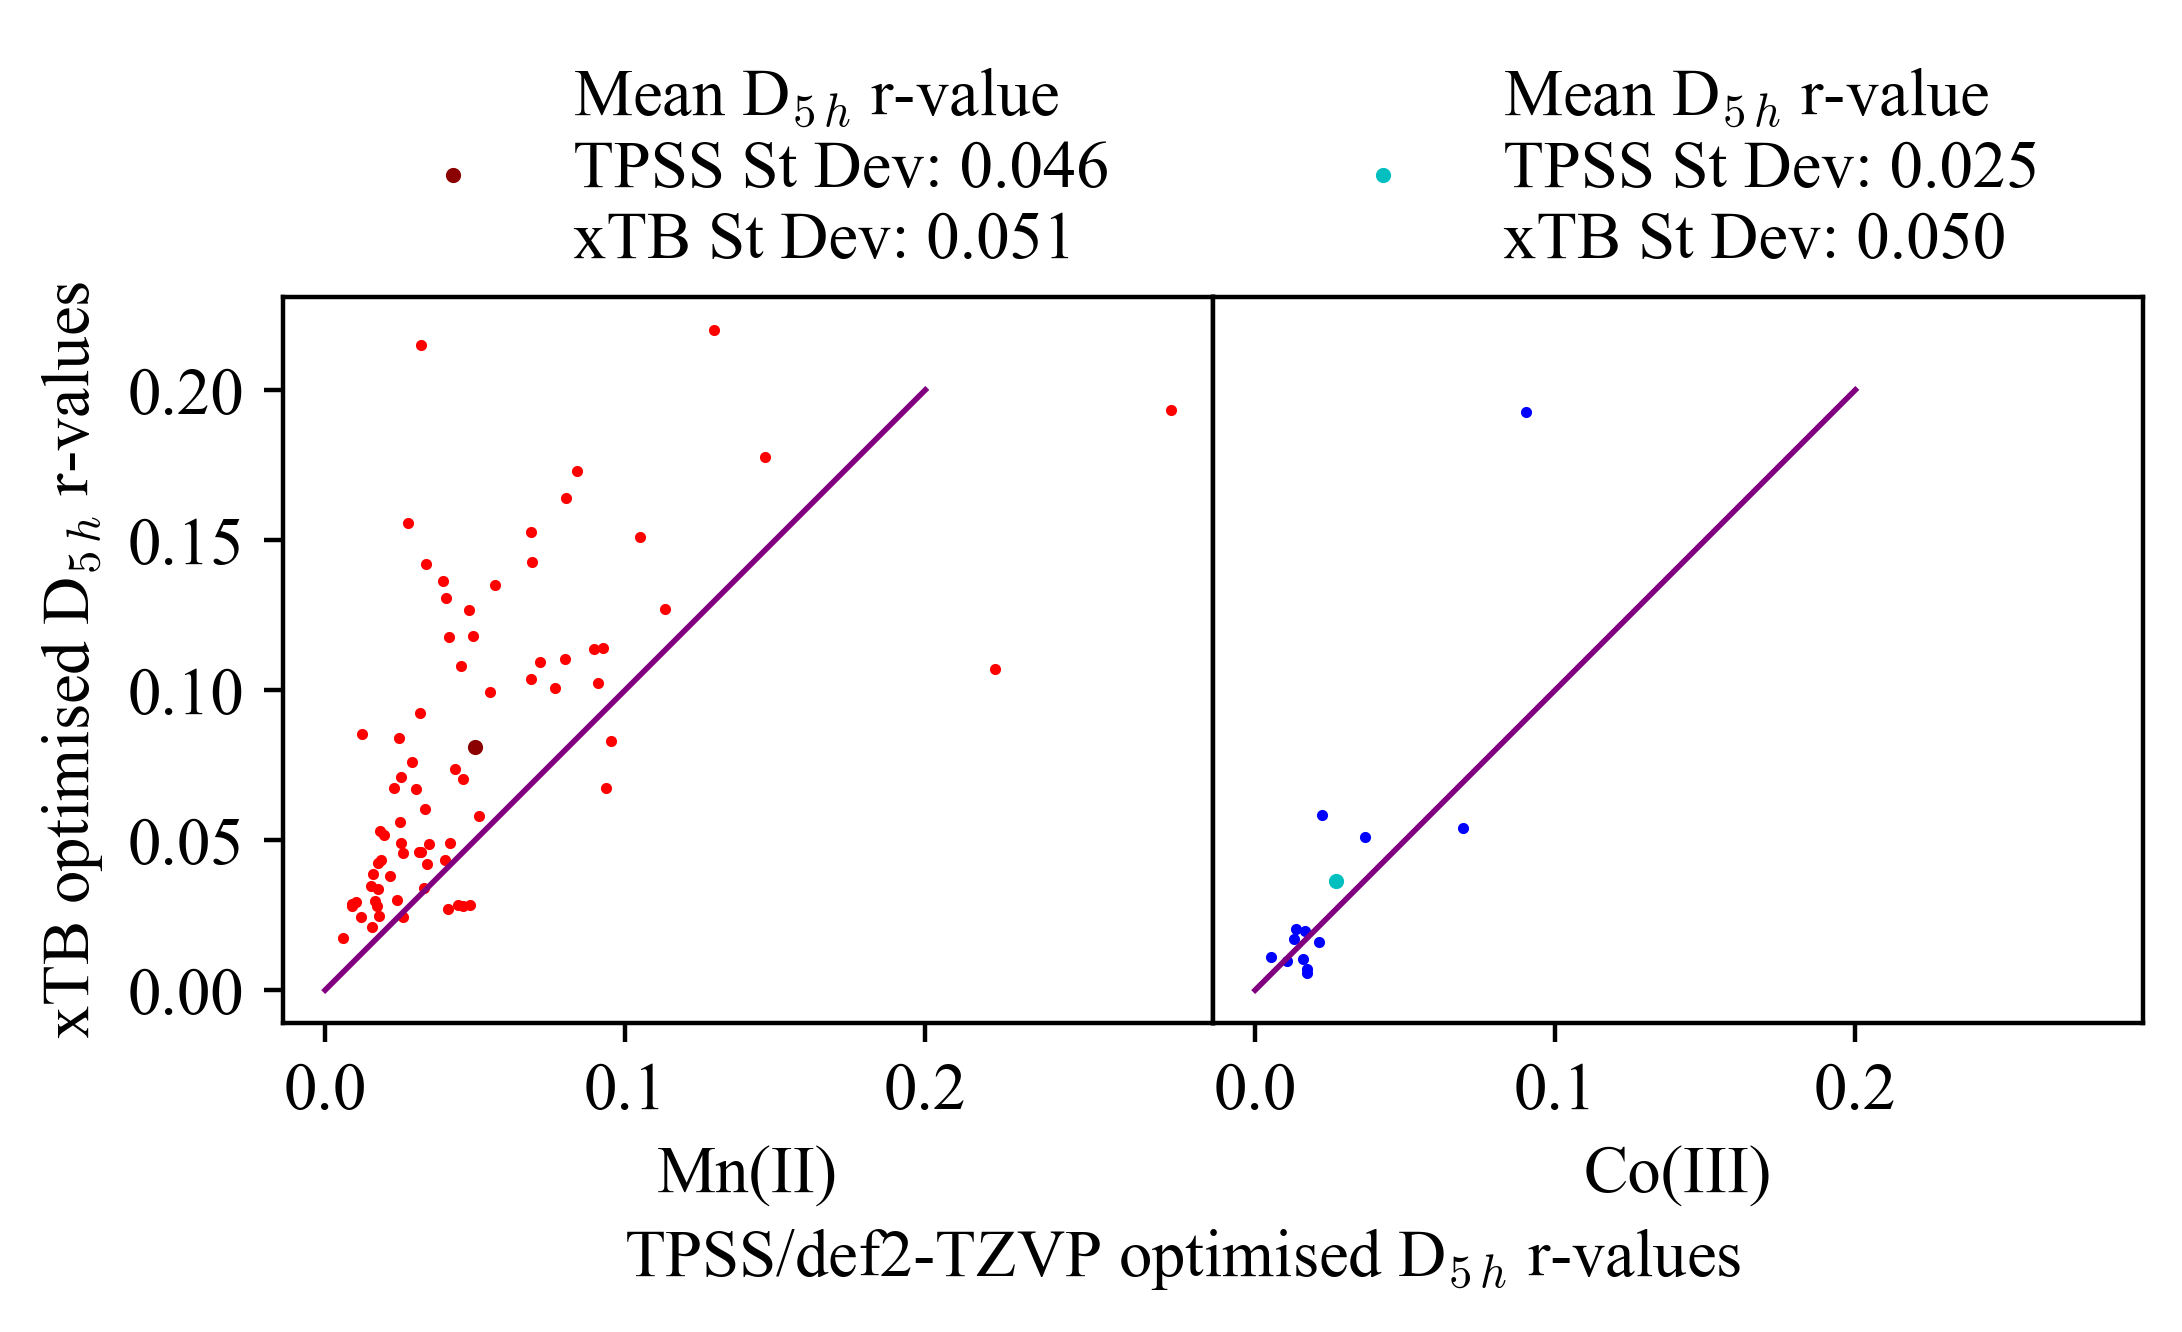

In [18]:
fig = plt.figure(figsize=(6,4), dpi=400)
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
ax = gs.subplots(sharey=True, sharex=True)
xTB_TPSS_Mn_pg = pd.merge(Mn_TPSS_pg, Mn_xTB_pg, left_on='identifier', right_on='identifier', how='inner')
mean_Mn = [xTB_TPSS_Mn_pg['Mn_ORCA_D5h'].mean(), xTB_TPSS_Mn_pg['Mn_xTB_D5h'].mean()]
stdev_Mn = [xTB_TPSS_Mn_pg['Mn_ORCA_D5h'].std(), xTB_TPSS_Mn_pg['Mn_xTB_D5h'].std()]
ax[0].scatter(xTB_TPSS_Mn_pg['Mn_ORCA_D5h'], xTB_TPSS_Mn_pg['Mn_xTB_D5h'], 1, color='r')
ax[0].plot([0,0.2], [0,0.2], linewidth=1, color='purple')
ax[0].scatter(mean_Mn[0], mean_Mn[1], 3, color='darkred', label=f'Mean D$_5$$_h$ r-value\nTPSS St Dev: '+str(round(stdev_Mn[0], 3))+'\nxTB St Dev: '+str(round(stdev_Mn[1], 3)))
xTB_TPSS_Co_pg = pd.merge(Co_TPSS_pg, Co_xTB_pg, left_on='identifier', right_on='identifier', how='inner')
mean_Co = [xTB_TPSS_Co_pg['Co_ORCA_D5h'].mean(), xTB_TPSS_Co_pg['Co_xTB_D5h'].mean()]
stdev_Co = [xTB_TPSS_Co_pg['Co_ORCA_D5h'].std(), xTB_TPSS_Co_pg['Co_xTB_D5h'].std()]
ax[1].scatter(xTB_TPSS_Co_pg['Co_ORCA_D5h'], xTB_TPSS_Co_pg['Co_xTB_D5h'], 1, color='b')
ax[1].plot([0,0.2], [0,0.2], linewidth=1, color='purple')
ax[1].scatter(mean_Co[0], mean_Co[1], 3, color='c', label=f'Mean D$_5$$_h$ r-value\nTPSS St Dev: '+str(round(stdev_Co[0], 3))+'\nxTB St Dev: '+str(round(stdev_Co[1], 3))+'0')
ax[0].set_aspect('equal', 'box')
ax[1].set_aspect('equal', 'box')
ax[1].yaxis.set_tick_params(which='both', bottom=False, top=False, labelbottom=False)
ax[0].set_ylabel(f'xTB optimised D$_5$$_h$ r-values')
ax[0].set_xlabel('Mn(II)')
ax[1].set_xlabel('Co(III)')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), frameon=False)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), frameon=False)
fig.text(0.5, 0.11, f'TPSS/def2-TZVP optimised D$_5$$_h$ r-values', ha='center')
fig.savefig(save_to_loc+'r-values_comp_Mn_Co_D5h.png', bbox_inches='tight')
print(stdev_Co)


In [19]:
xTB_TPSS_Mn_pg

,Mn_ORCA_D5h,Mn_ORCA_C2v,Mn_ORCA_C3v,Mn_xTB_D5h,Mn_xTB_C2v,Mn_xTB_C3v
identifier,,,,,,
BAFZEN_3_NS,0.093560,0.282660,0.164526,0.067287,0.280597,0.176642
BIKBON_3_NS,0.028948,0.308442,0.196745,0.076023,0.190028,0.093328
BILROF_NS,0.018328,0.282517,0.169061,0.052952,0.220662,0.096193
BOBZAT_1_NS,0.223042,0.181866,0.141700,0.106898,0.184814,0.098932
BOBZAT_4_NS,0.068792,0.250243,0.120692,0.142521,0.101329,0.051902
...,...,...,...,...,...,...
YAFXUY_1_NS,0.024586,0.296345,0.172430,0.084115,0.193775,0.130126
YAFYAF_NS,0.018526,0.242374,0.145952,0.043337,0.267417,0.142442
YIKNAH_1_m_NS,0.009000,0.295050,0.165845,0.028007,0.231615,0.105657


[0.01470354379827632, 0.03144530808598503]


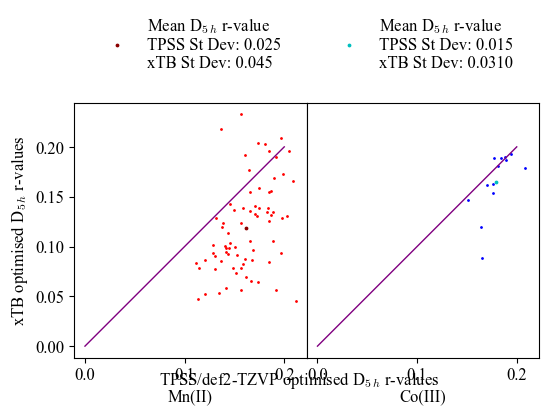

In [20]:
fig = plt.figure(figsize=(6,4), dpi=100)
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
ax = gs.subplots(sharey=True, sharex=True)
xTB_TPSS_Mn_pg = pd.merge(Mn_TPSS_pg, Mn_xTB_pg, left_on='identifier', right_on='identifier', how='inner')
mean_Mn = [xTB_TPSS_Mn_pg['Mn_ORCA_C3v'].mean(), xTB_TPSS_Mn_pg['Mn_xTB_C3v'].mean()]
stdev_Mn = [xTB_TPSS_Mn_pg['Mn_ORCA_C3v'].std(), xTB_TPSS_Mn_pg['Mn_xTB_C3v'].std()]
ax[0].scatter(xTB_TPSS_Mn_pg['Mn_ORCA_C3v'], xTB_TPSS_Mn_pg['Mn_xTB_C3v'], 1, color='r')
ax[0].plot([0,0.2], [0,0.2], linewidth=1, color='purple')
ax[0].scatter(mean_Mn[0], mean_Mn[1], 3, color='darkred', label=f'Mean D$_5$$_h$ r-value\nTPSS St Dev: '+str(round(stdev_Mn[0], 3))+'\nxTB St Dev: '+str(round(stdev_Mn[1], 3)))
xTB_TPSS_Co_pg = pd.merge(Co_TPSS_pg, Co_xTB_pg, left_on='identifier', right_on='identifier', how='inner')
mean_Co = [xTB_TPSS_Co_pg['Co_ORCA_C3v'].mean(), xTB_TPSS_Co_pg['Co_xTB_C3v'].mean()]
stdev_Co = [xTB_TPSS_Co_pg['Co_ORCA_C3v'].std(), xTB_TPSS_Co_pg['Co_xTB_C3v'].std()]
ax[1].scatter(xTB_TPSS_Co_pg['Co_ORCA_C3v'], xTB_TPSS_Co_pg['Co_xTB_C3v'], 1, color='b')
ax[1].plot([0,0.2], [0,0.2], linewidth=1, color='purple')
ax[1].scatter(mean_Co[0], mean_Co[1], 3, color='c', label=f'Mean D$_5$$_h$ r-value\nTPSS St Dev: '+str(round(stdev_Co[0], 3))+'\nxTB St Dev: '+str(round(stdev_Co[1], 3))+'0')
ax[0].set_aspect('equal', 'box')
ax[1].set_aspect('equal', 'box')
ax[1].yaxis.set_tick_params(which='both', bottom=False, top=False, labelbottom=False)
ax[0].set_ylabel(f'xTB optimised D$_5$$_h$ r-values')
ax[0].set_xlabel('Mn(II)')
ax[1].set_xlabel('Co(III)')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), frameon=False)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), frameon=False)
fig.text(0.5, 0.11, f'TPSS/def2-TZVP optimised D$_5$$_h$ r-values', ha='center')
fig.savefig(save_to_loc+'r-values_comp_Mn_Co_C3v.png', bbox_inches='tight')
print(stdev_Co)